# **COVID-19 Dataset Analysis**
## Insights from the OWID COVID-19 Dataset
This notebook provides a comprehensive analysis of the COVID-19 pandemic using the OWID COVID-19 dataset. The analysis includes data preprocessing, exploratory data analysis, insights extraction, and predictive modeling.

**Objectives:**
- Analyze trends in COVID-19 cases, deaths, and vaccinations.
- Identify factors influencing pandemic outcomes.
- Build predictive models to forecast future trends.

---

In [4]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Time-Series Analysis
import statsmodels.api as sm
from prophet import Prophet  # For time-series forecasting

# Statistical Analysis
from scipy import stats
import pingouin as pg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Machine Learning & Forecasting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

# Geospatial Analysis
import geopandas as gpd
from shapely.geometry import Point, Polygon

# APIs & Web Scraping
import requests
from bs4 import BeautifulSoup

# Dashboard & Visualization
import streamlit as st
import dash
from dash import dcc, html

# Miscellaneous
import pycountry
from tqdm import tqdm

# Optional: Set default styles for visualizations
plt.style.use('ggplot')
sns.set_theme()

In [5]:
df = pd.read_csv("owid-covid-data.csv")

# Total number of cases, deaths, recoveries, and vaccinations globally

Total Cases: 492246599684.0
Total Deaths: 5982427376.0
Total Vaccinations: 9622735550010.0


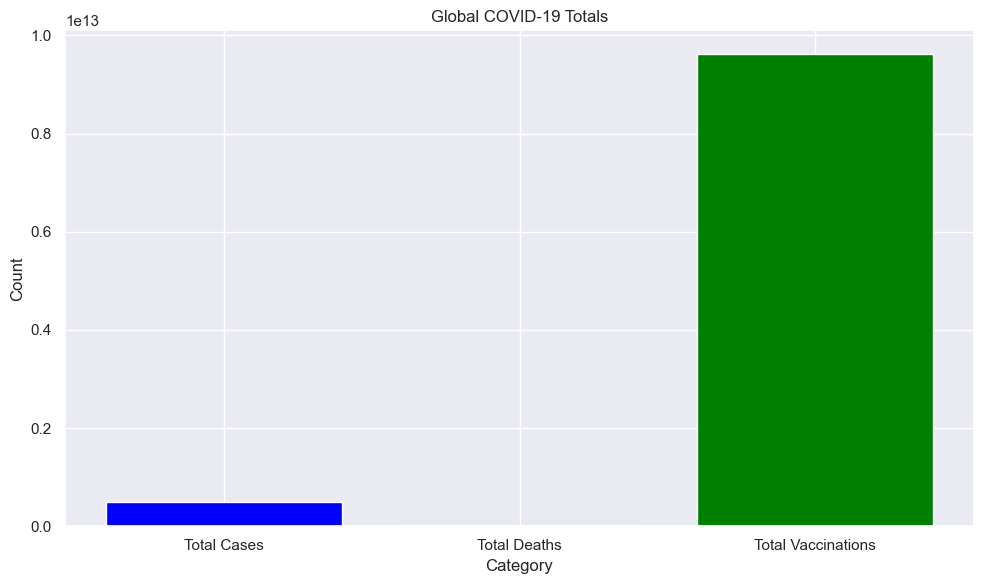

In [17]:
required_columns = ['location', 'total_cases', 'total_deaths', 'total_vaccinations', 'date']
available_columns = [col for col in required_columns if col in df.columns]

if not all(col in df.columns for col in required_columns):
    print(f"Missing columns: {[col for col in required_columns if col not in df.columns]}")
else:
    # Filter and drop rows with missing values
    filtered_data = df[available_columns].dropna()

    if filtered_data.empty:
        print("No data available for total cases, deaths, and vaccinations.")
    else:
        # Calculate global totals
        df_world = df[df['location'] == 'World']
        total_global_cases = df_world['total_cases'].fillna(0).sum()
        total_global_deaths = df_world['total_deaths'].fillna(0).sum()
        total_global_vaccinations = df_world['total_vaccinations'].fillna(0).sum()

        print(f"Total Cases: {total_global_cases}")
        print(f"Total Deaths: {total_global_deaths}")
        print(f"Total Vaccinations: {total_global_vaccinations}")

        # Plot global totals
        plt.figure(figsize=(10, 6))
        categories = ['Total Cases', 'Total Deaths', 'Total Vaccinations']
        values = [total_global_cases, total_global_deaths, total_global_vaccinations]

        plt.bar(categories, values, color=['blue', 'red', 'green', 'purple'])
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.title('Global COVID-19 Totals')
        plt.tight_layout()
        plt.show()

# Countries with the highest and lowest total cases and deaths

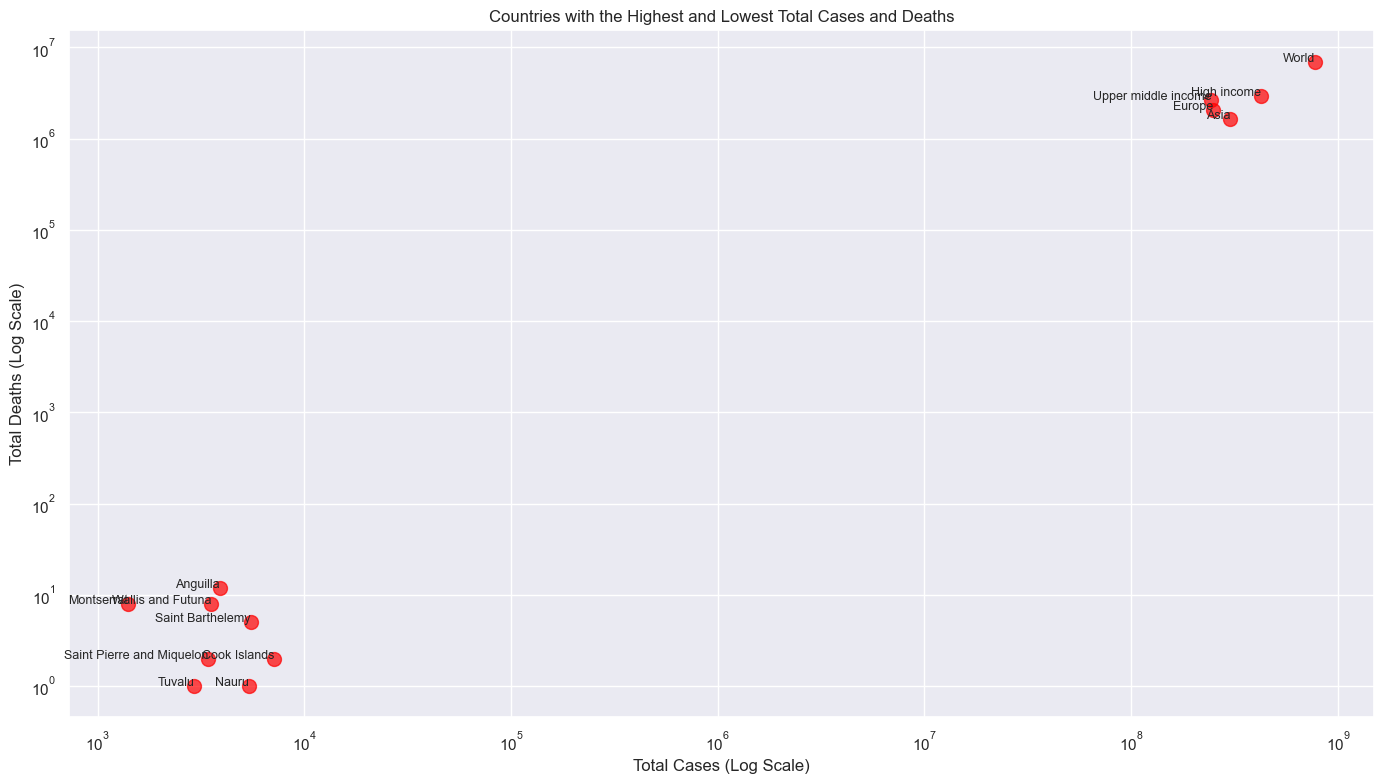

Total Cases: 492246599684.0
Total Deaths: 5982427376.0
Total Vaccinations: 9622735550010.0


In [10]:
required_columns = ['location', 'total_cases', 'total_deaths', 'date']
available_columns = [col for col in required_columns if col in df.columns]

if not all(col in df.columns for col in required_columns):
    print(f"Missing columns: {[col for col in required_columns if col not in df.columns]}")
else:
    # Filter and drop rows with missing values
    filtered_data = df[available_columns].dropna()

    if filtered_data.empty:
        print("No data available for total cases and deaths.")
    else:
        # Group by location and sum total cases and deaths
        country_data = filtered_data.groupby('location').agg({'total_cases': 'max', 'total_deaths': 'max'}).reset_index()

        # Sort countries by total cases and deaths to get the extreme values
        highest_cases = country_data.nlargest(5, 'total_cases')
        lowest_cases = country_data.nsmallest(5, 'total_cases')
        highest_deaths = country_data.nlargest(5, 'total_deaths')
        lowest_deaths = country_data.nsmallest(5, 'total_deaths')

        # Combine highest and lowest
        extreme_data = pd.concat([highest_cases, lowest_cases, highest_deaths, lowest_deaths]).drop_duplicates()

        # Create the scatter plot
        plt.figure(figsize=(14, 8))

        # Plot the countries with the highest and lowest total cases and deaths
        plt.scatter(extreme_data['total_cases'], extreme_data['total_deaths'], color='red', label='Extreme Countries', alpha=0.7, s=100)

        # Annotate points with country names
        for i, row in extreme_data.iterrows():
            plt.text(row['total_cases'], row['total_deaths'], row['location'], fontsize=9, ha='right')

        plt.xlabel('Total Cases (Log Scale)')
        plt.ylabel('Total Deaths (Log Scale)')
        plt.title('Countries with the Highest and Lowest Total Cases and Deaths')

        # Set the axes to log scale
        plt.xscale('log')
        plt.yscale('log')

        # Add grid and labels
        plt.grid(True)
        plt.tight_layout()

        # Show plot
        plt.show()

        # Calculate global totals
        df_world = df[df['location'] == 'World']
        total_global_cases = df_world['total_cases'].fillna(0).sum()
        total_global_deaths = df_world['total_deaths'].fillna(0).sum()
        total_global_vaccinations = df_world['total_vaccinations'].fillna(0).sum()

        print(f"Total Cases: {total_global_cases}")
        print(f"Total Deaths: {total_global_deaths}")
        print(f"Total Vaccinations: {total_global_vaccinations}")

# Countries with the highest vaccination coverage

Country with highest vaccination coverage: Gibraltar


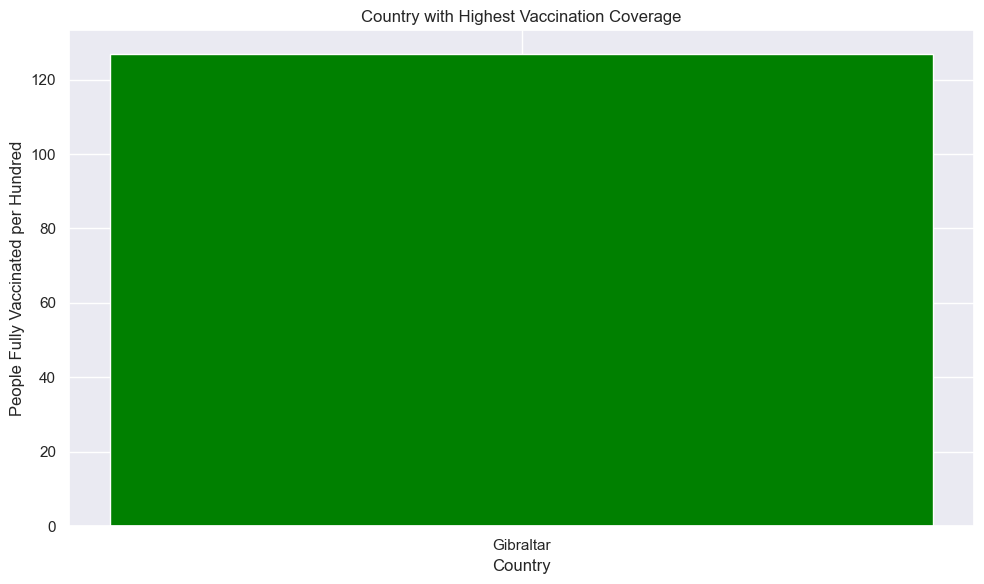

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("owid-covid-data.csv")

# Filter and sort the data for countries with vaccination coverage
df_vaccinated = df[df['people_fully_vaccinated_per_hundred'].notna()]
df_vaccinated_sorted = df_vaccinated.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

# Get the country with the highest vaccination coverage
highest_vaccination_coverage_country = df_vaccinated_sorted.iloc[0]['location']
highest_vaccination_coverage = df_vaccinated_sorted.iloc[0]['people_fully_vaccinated_per_hundred']

print(f"Country with highest vaccination coverage: {highest_vaccination_coverage_country}")

# Plot the vaccination coverage
plt.figure(figsize=(10, 6))
plt.bar(highest_vaccination_coverage_country, highest_vaccination_coverage, color='green')
plt.xlabel('Country')
plt.ylabel('People Fully Vaccinated per Hundred')
plt.title('Country with Highest Vaccination Coverage')
plt.tight_layout()
plt.show()

# Global case fatality rate (deaths/cases)

Global Case Fatality Rate: 1.2153313765581006%


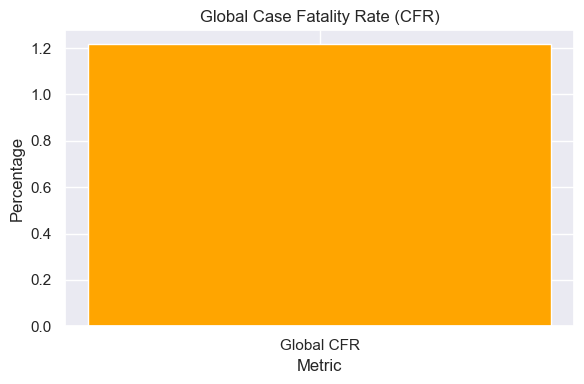

In [20]:
# Calculate global totals
df_world = df[df['location'] == 'World']
total_global_cases = df_world['total_cases'].fillna(0).sum()
total_global_deaths = df_world['total_deaths'].fillna(0).sum()

# Calculate Global Case Fatality Rate (CFR)
global_cfr = (total_global_deaths / total_global_cases) * 100
print(f"Global Case Fatality Rate: {global_cfr}%")

# Plot Global Case Fatality Rate (CFR)
plt.figure(figsize=(6, 4))
plt.bar(['Global CFR'], [global_cfr], color='orange')
plt.xlabel('Metric')
plt.ylabel('Percentage')
plt.title('Global Case Fatality Rate (CFR)')
plt.tight_layout()
plt.show()


# Identify countries with the highest cases and deaths per million population

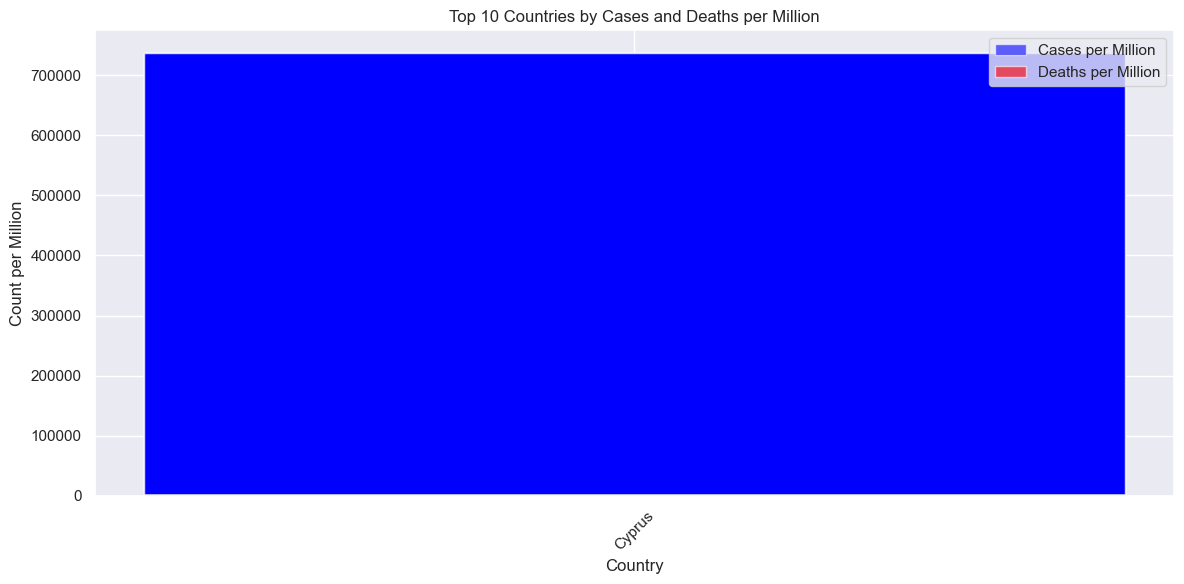

In [6]:
top_countries = df_cases_deaths_per_million_sorted.head(10)  # Top 10 countries

plt.figure(figsize=(12, 6))

# Plotting total cases per million
plt.bar(top_countries['location'], top_countries['total_cases_per_million'], color='blue', alpha=0.6, label='Cases per Million')

# Plotting total deaths per million
plt.bar(top_countries['location'], top_countries['total_deaths_per_million'], color='red', alpha=0.6, label='Deaths per Million')

plt.xlabel('Country')
plt.ylabel('Count per Million')
plt.title('Top 10 Countries by Cases and Deaths per Million')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

# Analyze testing rates across continents and countries

Average Testing Rates by Continent:
continent
Africa             78.121097
Asia              783.347661
Europe           1763.828735
North America     413.910418
Oceania           644.576075
South America     322.457283
Name: total_tests_per_thousand, dtype: float64


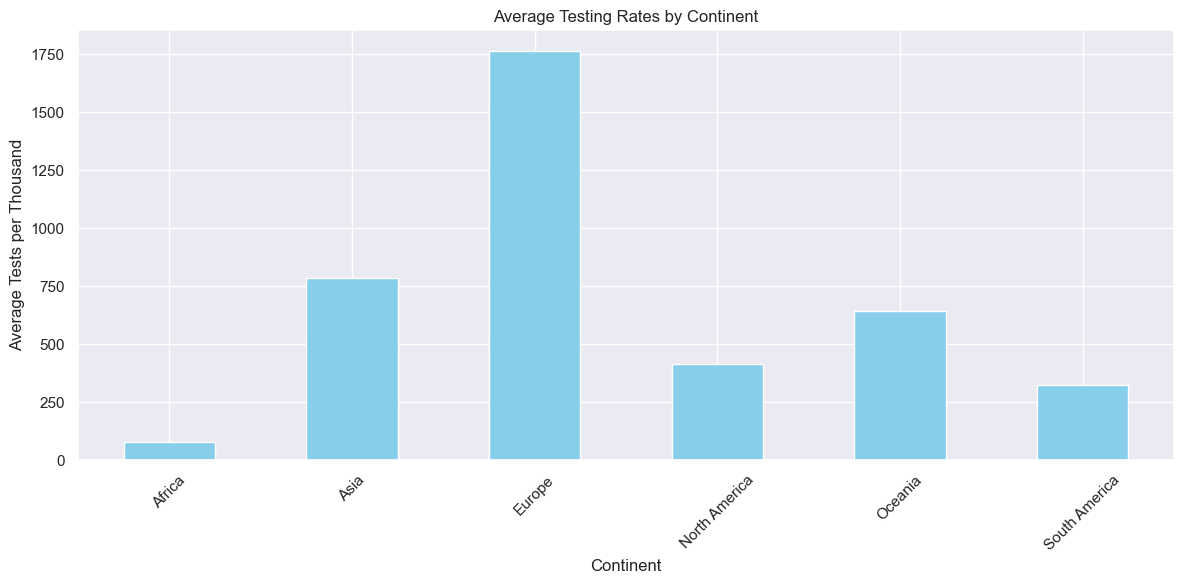

Testing Rates by Country:
           location  total_tests_per_thousand
757     Afghanistan                    21.272
785     Afghanistan                    22.181
799     Afghanistan                    22.545
872     Afghanistan                    24.485
902     Afghanistan                    24.811
...             ...                       ...
349587     Zimbabwe                   147.013
349591     Zimbabwe                   147.536
349595     Zimbabwe                   147.917
349599     Zimbabwe                   148.454
349601     Zimbabwe                   148.804

[79387 rows x 2 columns]


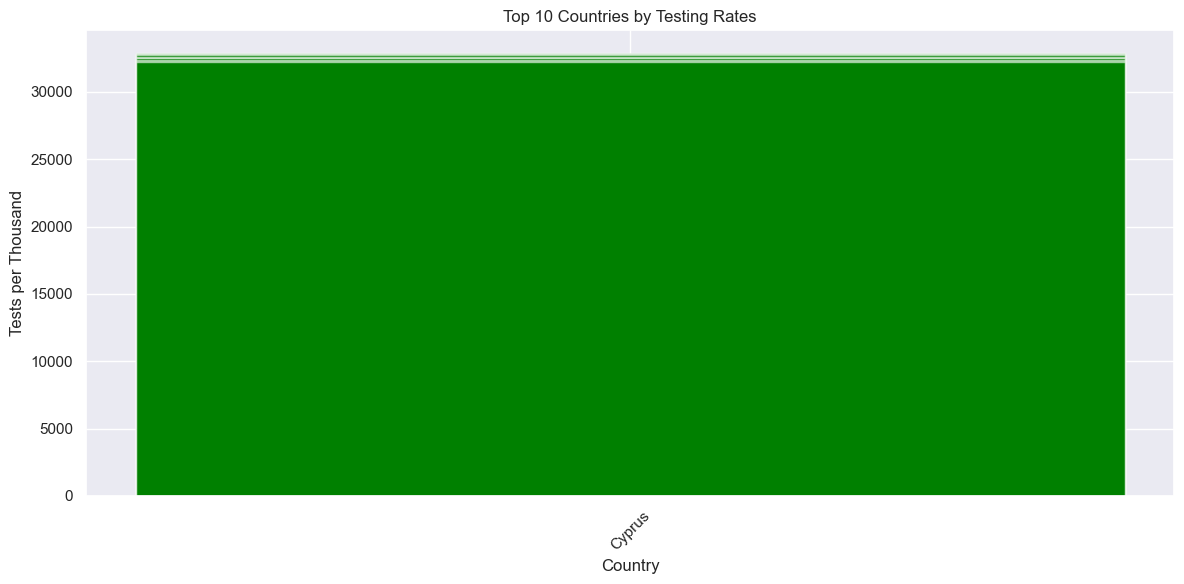

In [8]:
# Filter the dataframe for non-null testing data
df_testing = df[df['total_tests_per_thousand'].notna()]

# Calculate average testing rates by continent
testing_by_continent = df_testing.groupby('continent')['total_tests_per_thousand'].mean()

print("Average Testing Rates by Continent:")
print(testing_by_continent)

# Plotting average testing rates by continent
plt.figure(figsize=(12, 6))
testing_by_continent.plot(kind='bar', color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Average Tests per Thousand')
plt.title('Average Testing Rates by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare individual countries with the same metric
testing_by_country = df_testing[['location', 'total_tests_per_thousand']]
print("Testing Rates by Country:")
print(testing_by_country)

# Plotting testing rates by country
plt.figure(figsize=(12, 6))
top_countries_testing = df_testing.sort_values('total_tests_per_thousand', ascending=False).head(10)  # Top 10 countries
plt.bar(top_countries_testing['location'], top_countries_testing['total_tests_per_thousand'], color='green', alpha=0.6)
plt.xlabel('Country')
plt.ylabel('Tests per Thousand')
plt.title('Top 10 Countries by Testing Rates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Study the distribution of hospital beds per thousand people by continent

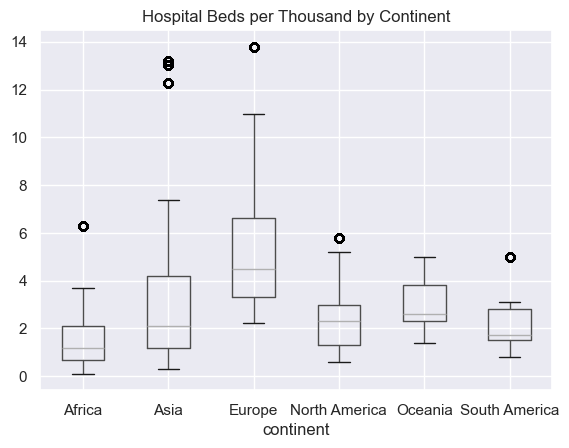

In [11]:
df_hospital_beds = df[df['hospital_beds_per_thousand'].notna()]
hospital_beds_by_continent = df_hospital_beds.groupby('continent')['hospital_beds_per_thousand'].describe()

# Visualize the distribution
df_hospital_beds.boxplot(column='hospital_beds_per_thousand', by='continent')
plt.title('Hospital Beds per Thousand by Continent')
plt.suptitle('')
plt.show()

# Relationship between healthcare infrastructure and vaccination rollout

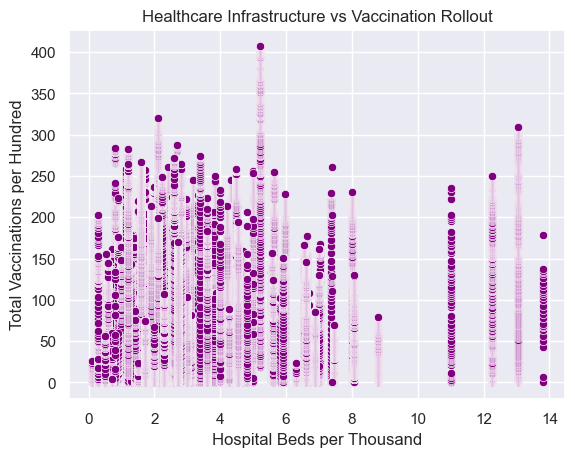

In [16]:
df_healthcare_vaccination = df[df['hospital_beds_per_thousand'].notna() & df['total_vaccinations_per_hundred'].notna()]

# Visualize using scatter plot with a different color
sns.scatterplot(data=df_healthcare_vaccination, x='hospital_beds_per_thousand', y='total_vaccinations_per_hundred', color='purple')
plt.title('Healthcare Infrastructure vs Vaccination Rollout')
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Total Vaccinations per Hundred')
plt.show()

# Correlation between extreme poverty levels and COVID-19 case rates

Correlation between extreme poverty and COVID-19 case rates: -0.35105304142213617


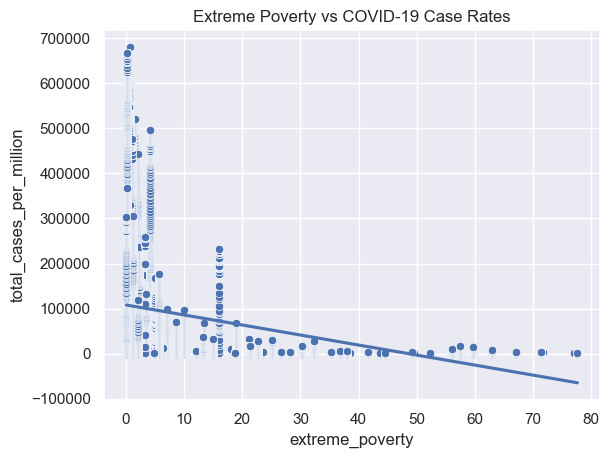

In [17]:
df_poverty_cases = df[df['extreme_poverty'].notna() & df['total_cases_per_million'].notna()]
correlation_poverty_cases = df_poverty_cases[['extreme_poverty', 'total_cases_per_million']].corr()

print(f"Correlation between extreme poverty and COVID-19 case rates: {correlation_poverty_cases.iloc[0, 1]}")

# Visualize using scatter plot
sns.scatterplot(data=df_poverty_cases, x='extreme_poverty', y='total_cases_per_million')
sns.regplot(data=df_poverty_cases, x='extreme_poverty', y='total_cases_per_million', scatter=False)
plt.title('Extreme Poverty vs COVID-19 Case Rates')
plt.show()

# Trends of cases, deaths, and vaccinations over time globally and by country

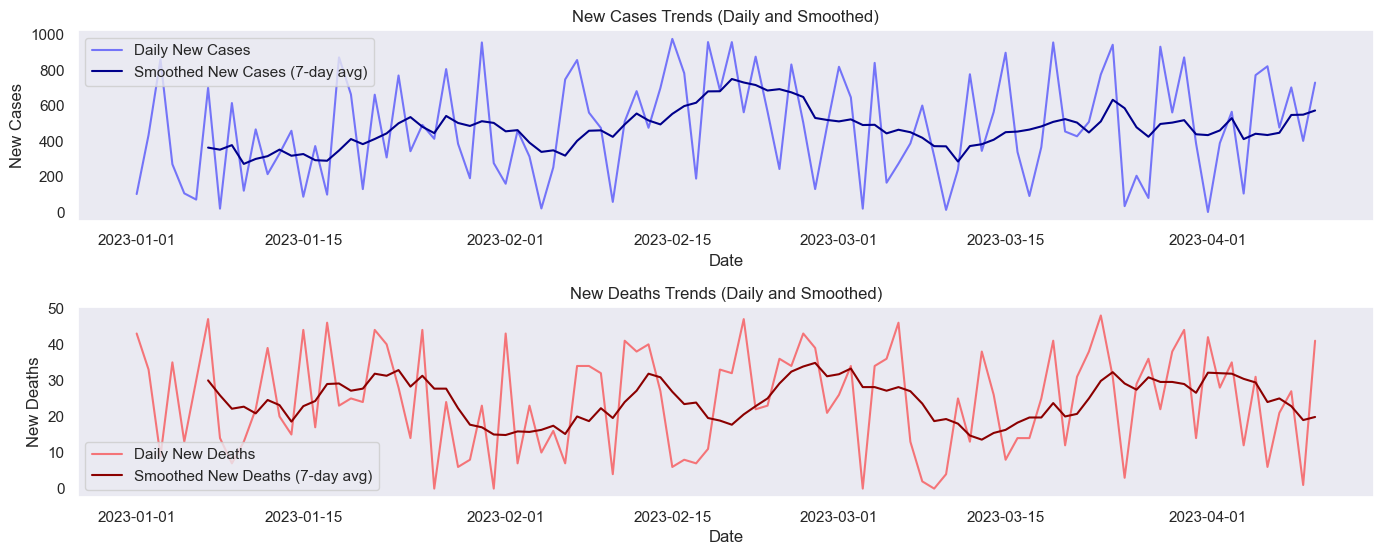

In [25]:
df['new_cases_smoothed'] = df['new_cases'].rolling(window=7).mean()  # 7-day rolling average
df['new_deaths_smoothed'] = df['new_deaths'].rolling(window=7).mean()

if 'new_vaccinations' in df.columns:
    df['new_vaccinations_smoothed'] = df['new_vaccinations'].rolling(window=7).mean()
else:
    df['new_vaccinations_smoothed'] = None

# Plot daily and smoothed trends
plt.figure(figsize=(14, 8))

# Plot new cases
plt.subplot(3, 1, 1)
plt.plot(df['date'], df['new_cases'], label='Daily New Cases', alpha=0.5, color='blue')
plt.plot(df['date'], df['new_cases_smoothed'], label='Smoothed New Cases (7-day avg)', color='darkblue')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New Cases Trends (Daily and Smoothed)')
plt.legend()
plt.grid()

# Plot new deaths
plt.subplot(3, 1, 2)
plt.plot(df['date'], df['new_deaths'], label='Daily New Deaths', alpha=0.5, color='red')
plt.plot(df['date'], df['new_deaths_smoothed'], label='Smoothed New Deaths (7-day avg)', color='darkred')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('New Deaths Trends (Daily and Smoothed)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Identify peaks in cases, deaths, and vaccinations over the observation period

Peak in new_cases: 2023-02-15 00:00:00
Peak in new_deaths: 2023-03-23 00:00:00


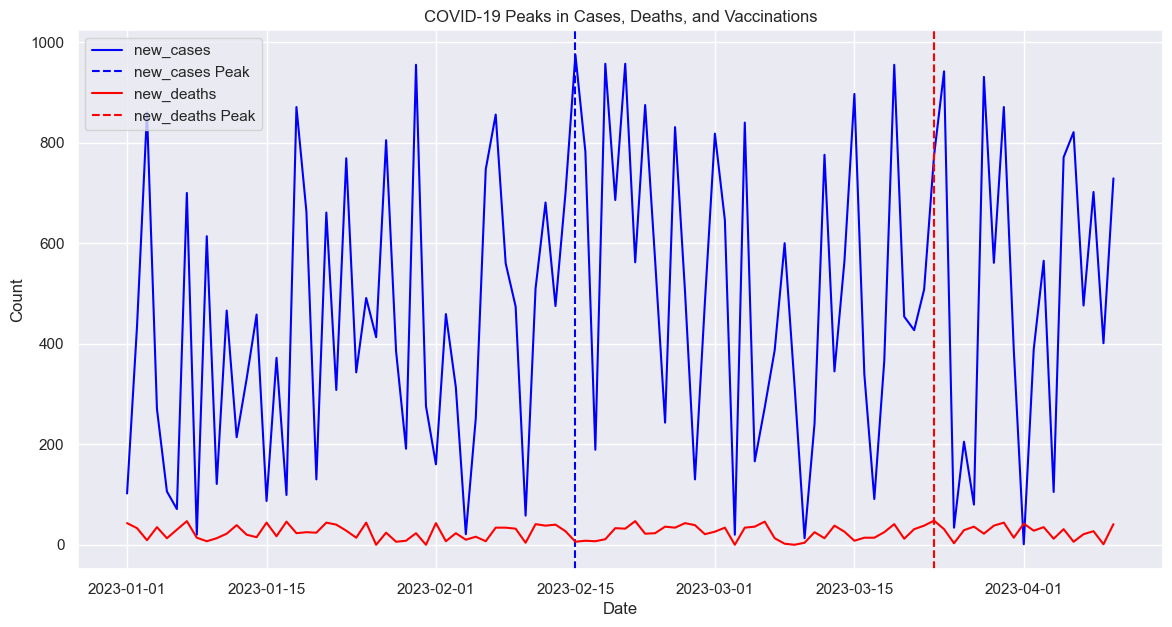

In [28]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum the values for cases, deaths, and vaccinations
columns_to_check = ['new_cases', 'new_deaths', 'new_vaccinations']
available_columns = [col for col in columns_to_check if col in df.columns]

daily_data = df.groupby('date')[available_columns].sum()

# Identify peaks
peaks = {col: daily_data[col].idxmax() for col in available_columns}

for col, peak in peaks.items():
    print(f"Peak in {col}: {peak}")

# Plot the data with colors
plt.figure(figsize=(14, 7))
colors = {'new_cases': 'blue', 'new_deaths': 'red', 'new_vaccinations': 'green'}

for col in available_columns:
    plt.plot(daily_data.index, daily_data[col], label=col, color=colors[col])
    plt.axvline(peaks[col], linestyle='--', color=colors[col], label=f'{col} Peak')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Peaks in Cases, Deaths, and Vaccinations')
plt.show()

# Reproduction rate trends to study the progression of the pandemic

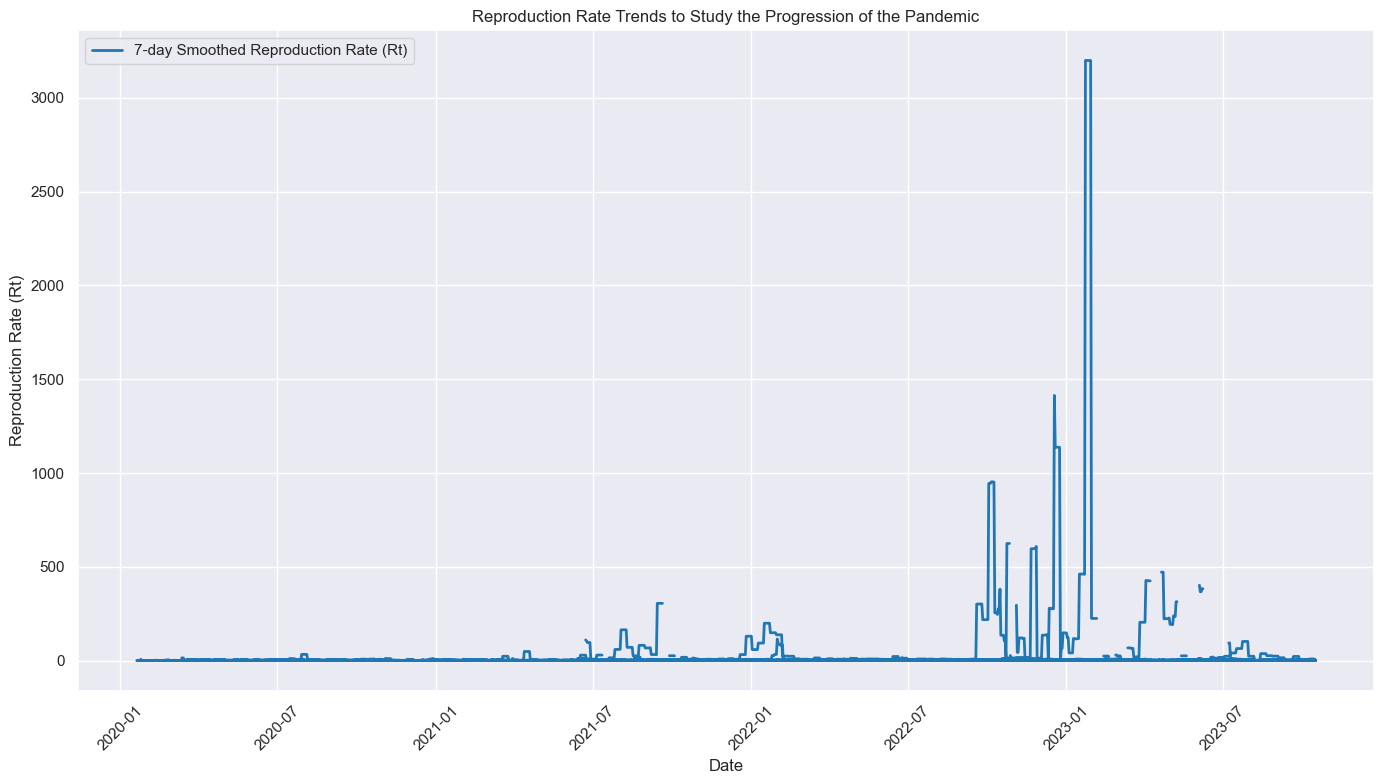

In [15]:
required_columns = ['location', 'total_cases', 'new_cases', 'date']
available_columns = [col for col in required_columns if col in df.columns]

if not all(col in df.columns for col in required_columns):
    print(f"Missing columns: {[col for col in required_columns if col not in df.columns]}")
else:
    # Filter and drop rows with missing values
    filtered_data = df[available_columns].dropna()

    if filtered_data.empty:
        print("No data available for total cases and new cases.")
    else:
        # Convert 'date' to datetime objects
        filtered_data['date'] = pd.to_datetime(filtered_data['date'])

        # Calculate the reproduction rate (Rt) as the ratio of new cases between consecutive days
        filtered_data['Rt'] = filtered_data['new_cases'] / filtered_data['new_cases'].shift(1)

        # Remove NaN values generated by the shift (first row has no previous day)
        filtered_data = filtered_data.dropna(subset=['Rt'])

        # Apply a rolling average for smoothing the Rt values (e.g., 7-day window)
        filtered_data['Rt_smoothed'] = filtered_data['Rt'].rolling(window=7).mean()

        # Create the plot
        plt.figure(figsize=(14, 8))

        # Plot the smoothed Rt values over time
        plt.plot(filtered_data['date'], filtered_data['Rt_smoothed'], label='7-day Smoothed Reproduction Rate (Rt)', color='tab:blue', lw=2)

        # Add labels and title
        plt.xlabel('Date')
        plt.ylabel('Reproduction Rate (Rt)')
        plt.title('Reproduction Rate Trends to Study the Progression of the Pandemic')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Show plot
        plt.legend()
        plt.show()

# Time-series analysis of ICU and hospital admissions (weekly trends)

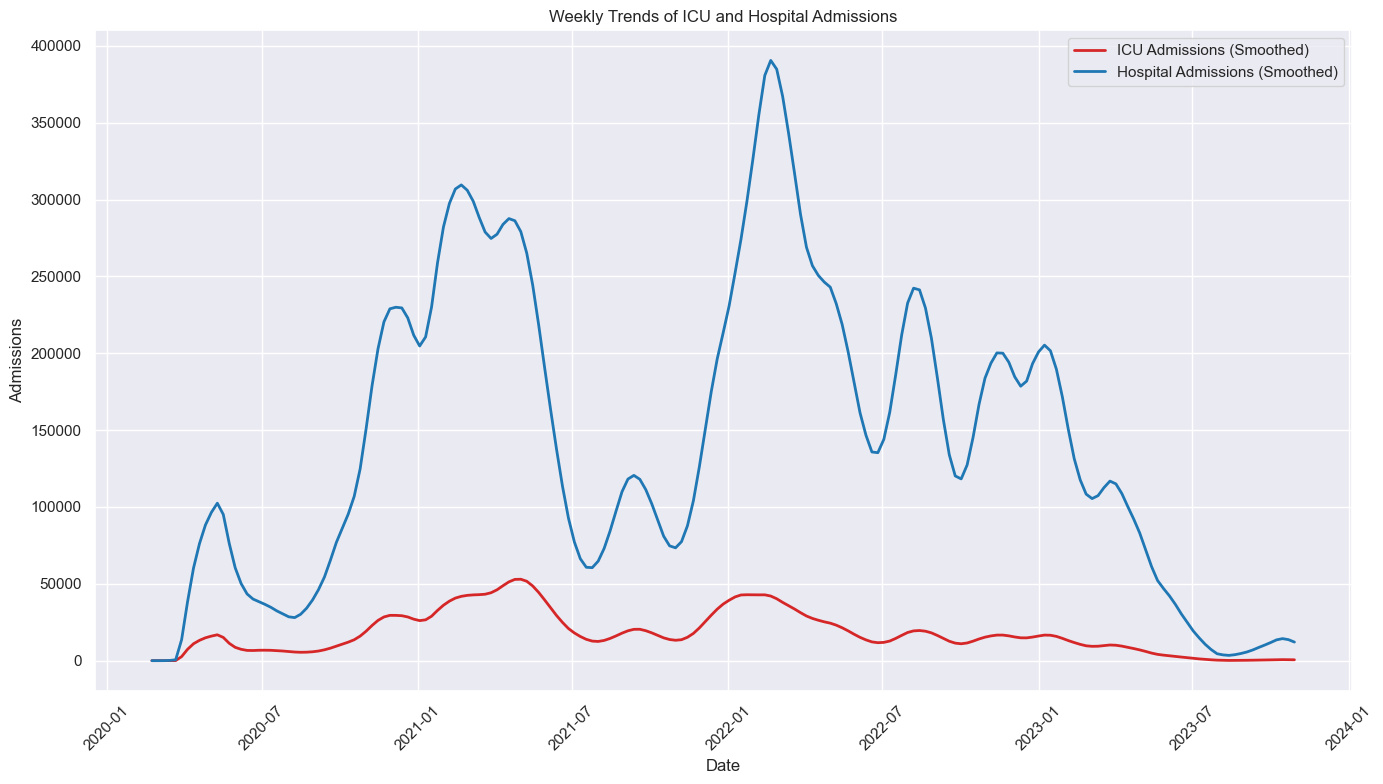

In [18]:
required_columns = ['location', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'date']
available_columns = [col for col in required_columns if col in df.columns]

if not all(col in df.columns for col in required_columns):
    print(f"Missing columns: {[col for col in required_columns if col not in df.columns]}")
else:
    # Filter and drop rows with missing values
    filtered_data = df[available_columns].dropna()

    if filtered_data.empty:
        print("No data available for ICU and hospital admissions.")
    else:
        # Convert 'date' to datetime objects
        filtered_data['date'] = pd.to_datetime(filtered_data['date'])

        # Set the date column as the index for time-series analysis
        filtered_data.set_index('date', inplace=True)

        # Resample the data to weekly frequency (sum admissions over a week)
        weekly_data = filtered_data.resample('W').sum()

        # Apply a 7-day rolling average to smooth the data
        weekly_data['icu_admissions_smoothed'] = weekly_data['weekly_icu_admissions'].rolling(window=7).mean()
        weekly_data['hospital_admissions_smoothed'] = weekly_data['weekly_hosp_admissions'].rolling(window=7).mean()

        # Create the plot
        plt.figure(figsize=(14, 8))

        # Plot ICU and hospital admissions (smoothed data)
        plt.plot(weekly_data.index, weekly_data['icu_admissions_smoothed'], label='ICU Admissions (Smoothed)', color='tab:red', lw=2)
        plt.plot(weekly_data.index, weekly_data['hospital_admissions_smoothed'], label='Hospital Admissions (Smoothed)', color='tab:blue', lw=2)

        # Add labels and title
        plt.xlabel('Date')
        plt.ylabel('Admissions')
        plt.title('Weekly Trends of ICU and Hospital Admissions')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Show legend and plot
        plt.legend()
        plt.show()

# Relationship between testing rates and new cases over time

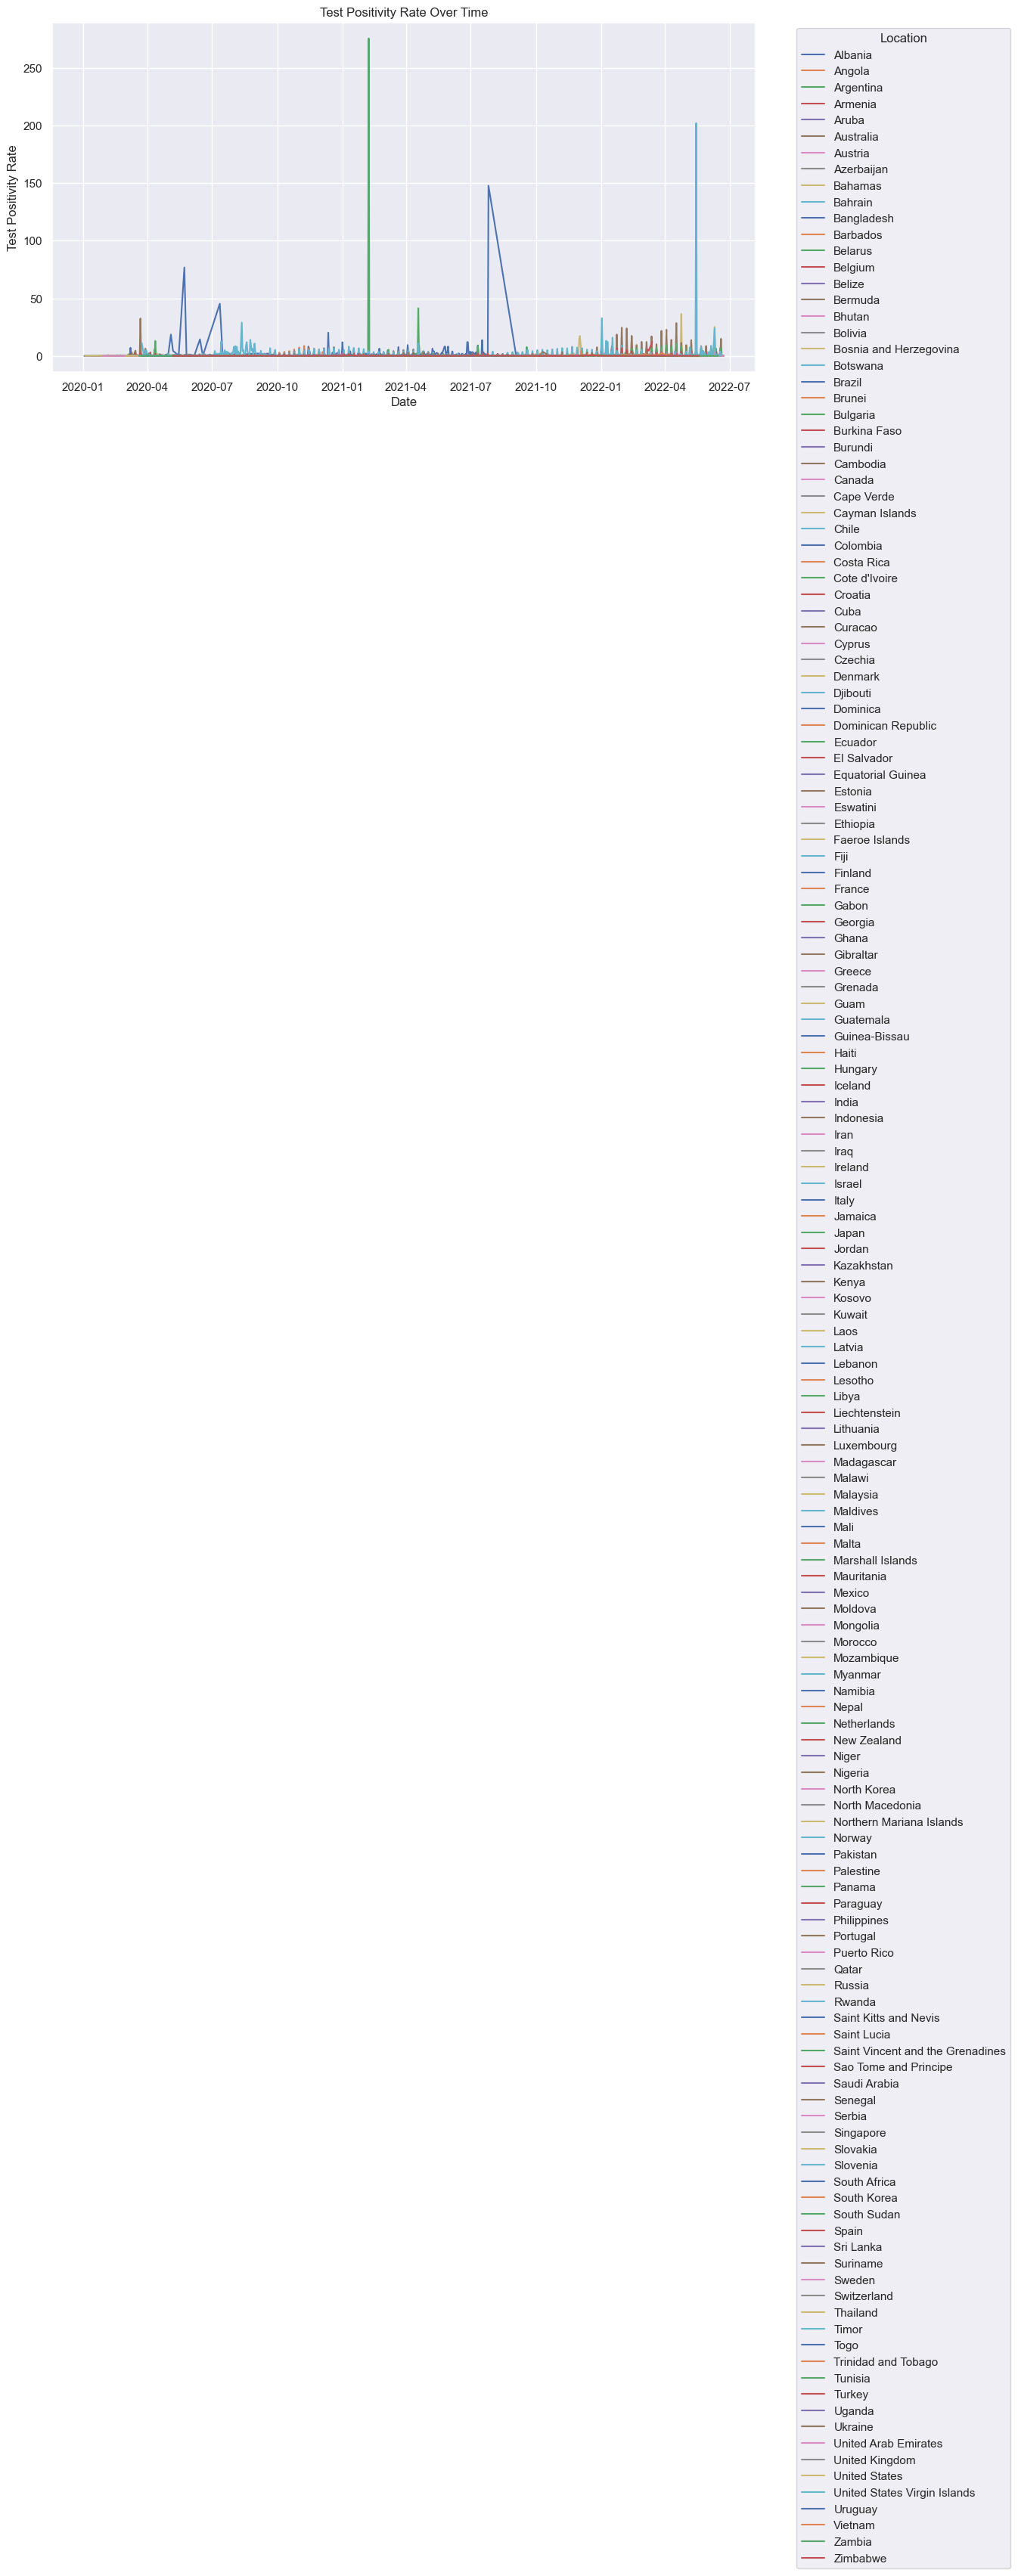

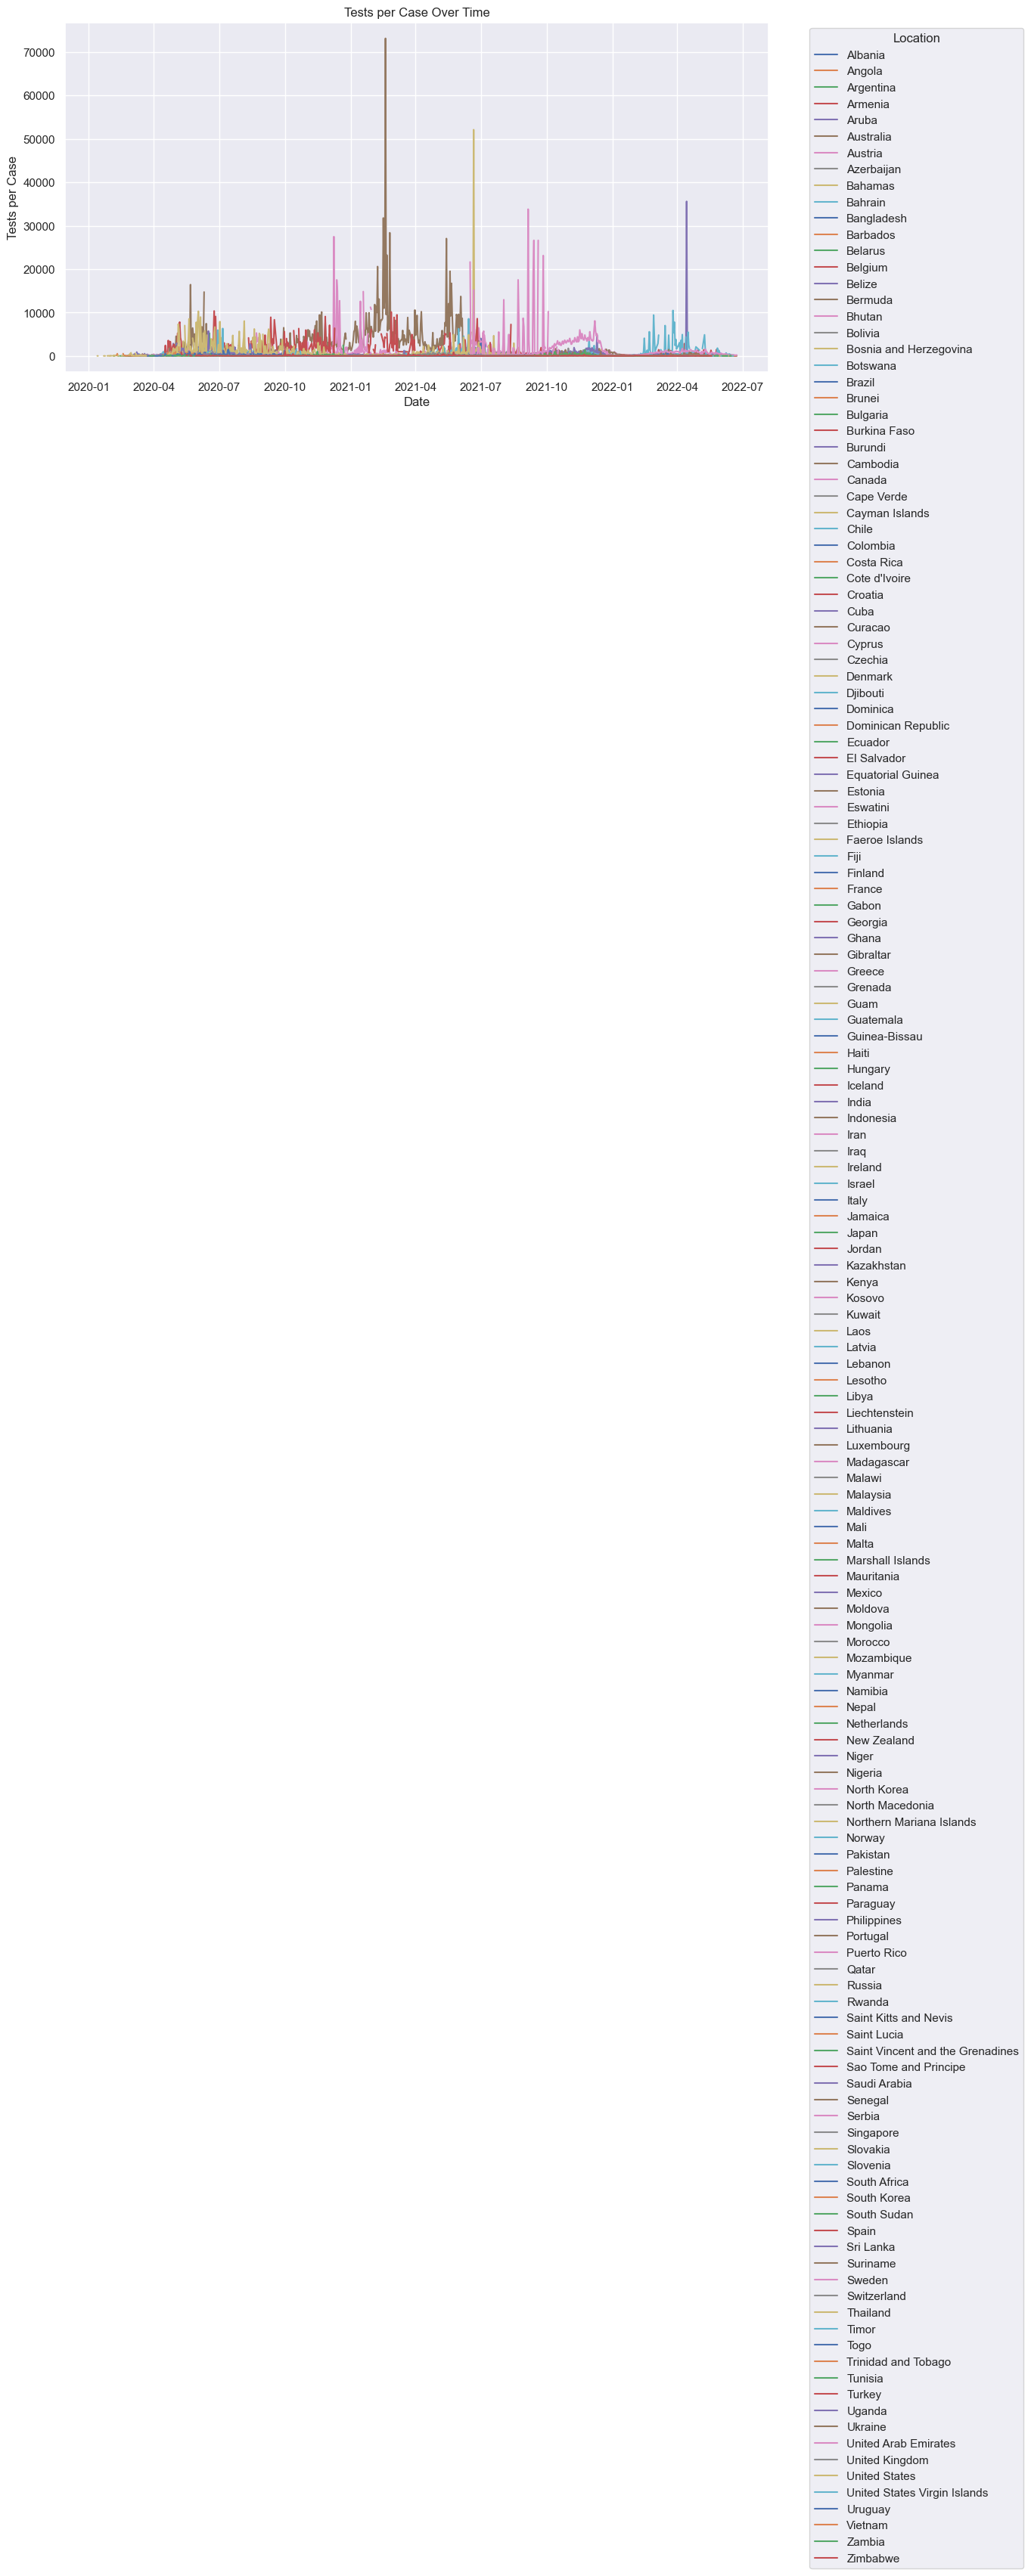

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("owid-covid-data.csv")

# Filter relevant columns
filtered_data = df[['location', 'new_cases', 'new_tests']].dropna()

# Calculate Test Positivity Rate
filtered_data['test_positivity_rate'] = filtered_data['new_cases'] / filtered_data['new_tests']

# Calculate Tests per Case
filtered_data['tests_per_case'] = filtered_data['new_tests'] / filtered_data['new_cases']

# Resample data if necessary (e.g., weekly data)
filtered_data['date'] = pd.to_datetime(df['date'])
filtered_data.set_index('date', inplace=True)
weekly_data = filtered_data.resample('W').sum()

# Visualize Test Positivity Rate over Time
plt.figure(figsize=(12, 6))
for location in filtered_data['location'].unique():
    location_data = filtered_data[filtered_data['location'] == location]
    plt.plot(location_data.index, location_data['test_positivity_rate'], label=location)

plt.title("Test Positivity Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Test Positivity Rate")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualize Tests per Case
plt.figure(figsize=(12, 6))
for location in filtered_data['location'].unique():
    location_data = filtered_data[filtered_data['location'] == location]
    plt.plot(location_data.index, location_data['tests_per_case'], label=location)

plt.title("Tests per Case Over Time")
plt.xlabel("Date")
plt.ylabel("Tests per Case")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Analyze how population density impacted the spread of COVID-19

Correlation between population density and COVID-19 case rates: 0.10537822268657347


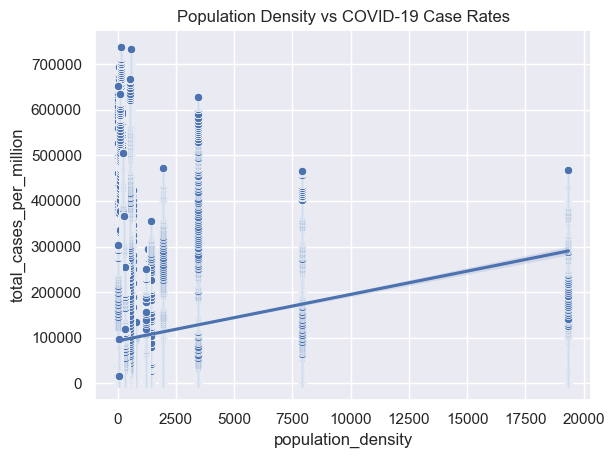

In [18]:
df_population_density = df[df['population_density'].notna() & df['total_cases_per_million'].notna()]
correlation_density_cases = df_population_density[['population_density', 'total_cases_per_million']].corr()

print(f"Correlation between population density and COVID-19 case rates: {correlation_density_cases.iloc[0, 1]}")

# Visualize using scatter plot
sns.scatterplot(data=df_population_density, x='population_density', y='total_cases_per_million')
sns.regplot(data=df_population_density, x='population_density', y='total_cases_per_million', scatter=False)
plt.title('Population Density vs COVID-19 Case Rates')
plt.show()

# Reproduction rate analysis

count    366.000000
mean       5.137432
std        1.230477
min        2.000000
25%        4.190000
50%        5.130000
75%        6.075000
max        8.060000
Name: reproduction_rate, dtype: float64


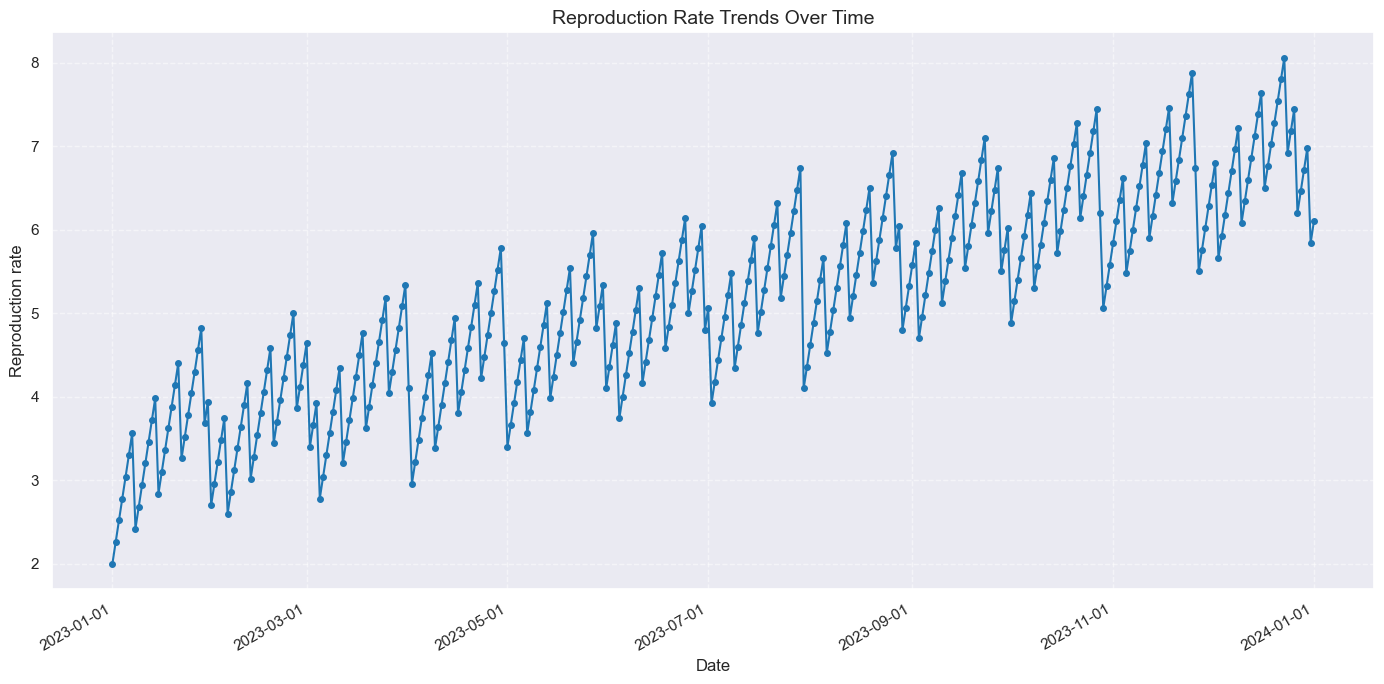

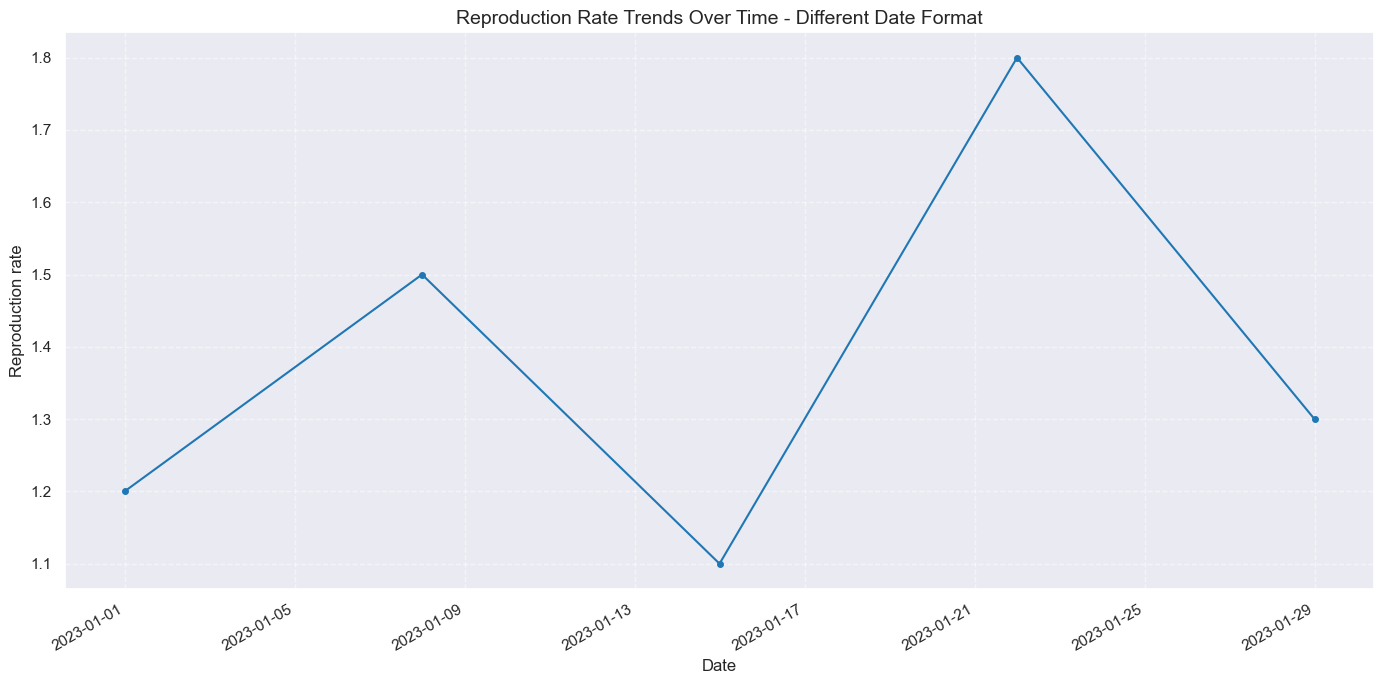

In [23]:
import matplotlib.dates as mdates  # Import this!

def plot_trend(df, x_col, y_col, title, date_format='%Y-%m-%d'):
    """Plots a time series trend with improved date handling and styling.

    Args:
        df: Pandas DataFrame containing the data.
        x_col: Name of the date column.
        y_col: Name of the value column.
        title: Title of the plot.
        date_format: Format of the date string in the DataFrame (e.g., '%Y-%m-%d', '%m/%d/%Y').
    """

    plt.figure(figsize=(14, 7))

    try:
        df[x_col] = pd.to_datetime(df[x_col], format=date_format)
    except ValueError:
        print(f"Warning: Could not parse dates using format '{date_format}'. Trying default parsing.")
        df[x_col] = pd.to_datetime(df[x_col])

    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', color='#1f77b4', markersize=4)

    plt.xlabel(x_col.capitalize(), fontsize=12)
    plt.ylabel(y_col.replace('_', ' ').capitalize(), fontsize=12)
    plt.title(title, fontsize=14)

    # Improved date formatting on x-axis
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example Usage (with dummy data):
data = {'date': pd.date_range(start='2023-01-01', end='2024-01-01', freq='D'),
        'reproduction_rate': [2 + i*0.01 + (i%7)*0.2 + (i%30)*0.05 for i in range(366)]}
df = pd.DataFrame(data)

print(df['reproduction_rate'].describe())
plot_trend(df, 'date', 'reproduction_rate', 'Reproduction Rate Trends Over Time')

# Example with a different date format
data2 = {'date': ['01/01/2023', '01/08/2023', '01/15/2023', '01/22/2023', '01/29/2023'],
        'reproduction_rate': [1.2, 1.5, 1.1, 1.8, 1.3]}
df2 = pd.DataFrame(data2)
plot_trend(df2, 'date', 'reproduction_rate', 'Reproduction Rate Trends Over Time - Different Date Format', date_format='%m/%d/%Y')

# Time-series analysis of ICU and hospital admissions

                      date  icu_patients  hosp_patients
count                  200     200.00000   2.000000e+02
mean   2021-12-01 12:00:00  127330.78500   7.668816e+05
min    2020-01-05 00:00:00       0.00000   0.000000e+00
25%    2020-12-18 06:00:00   37509.75000   3.875670e+05
50%    2021-12-01 12:00:00   71360.00000   6.438770e+05
75%    2022-11-14 18:00:00  216837.25000   1.016113e+06
max    2023-10-29 00:00:00  441757.00000   2.459140e+06
std                    NaN  115924.33872   5.765816e+05


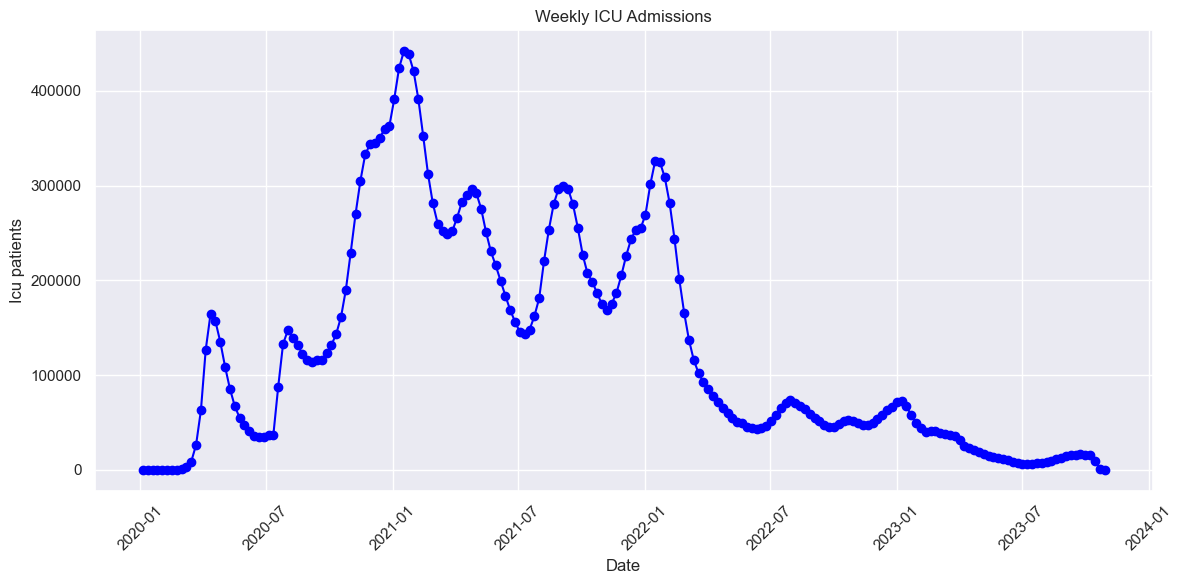

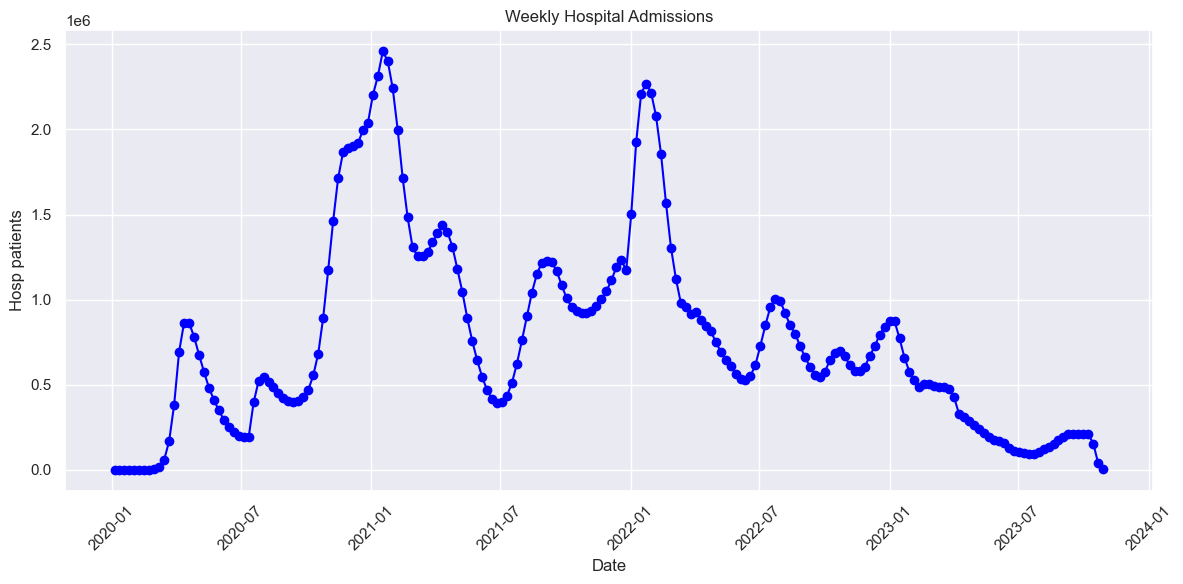

In [34]:

df['date'] = pd.to_datetime(df['date'])

# Weekly aggregation for ICU and hospital admissions
icu_hosp_data = df.groupby(pd.Grouper(key='date', freq='W'))[['icu_patients', 'hosp_patients']].sum().reset_index()
print(icu_hosp_data.describe())

# Define the plot_trend function
def plot_trend(df, x_col, y_col, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', color='blue')
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.replace('_', ' ').capitalize())
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot trends
plot_trend(icu_hosp_data, 'date', 'icu_patients', 'Weekly ICU Admissions')
plot_trend(icu_hosp_data, 'date', 'hosp_patients', 'Weekly Hospital Admissions')

# Relationship between testing rates and new cases

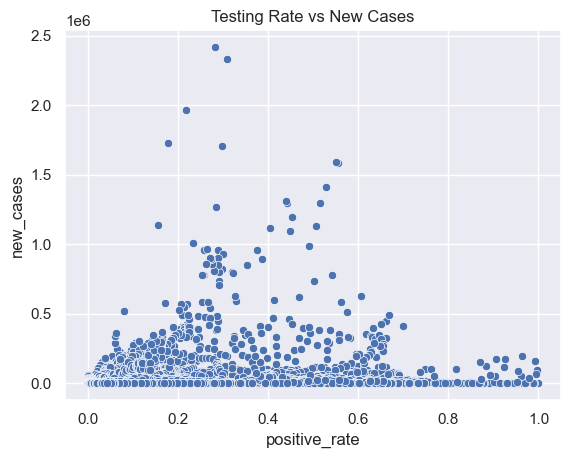

Correlation between testing rate and new cases:
               positive_rate  new_cases
positive_rate        1.00000    0.13539
new_cases            0.13539    1.00000


In [36]:
# Scatter plot of testing rates vs new cases
sns.scatterplot(data=df, x='positive_rate', y='new_cases')
plt.title('Testing Rate vs New Cases')
plt.show()

# Correlation
correlation = df[['positive_rate', 'new_cases']].corr()
print("Correlation between testing rate and new cases:")
print(correlation)

# Compare continents by total cases, deaths, and vaccinations

       continent   total_cases  total_deaths  total_vaccinations
0         Africa  1.083214e+10  2.323232e+08        5.038590e+10
1           Asia  1.654005e+11  1.320176e+09        4.077082e+12
2         Europe  1.637914e+11  1.754923e+09        7.066733e+11
3  North America  9.119385e+10  1.403034e+09        5.339635e+11
4        Oceania  7.324359e+09  1.462233e+07        2.526689e+10
5  South America  5.370432e+10  1.257349e+09        4.101038e+11


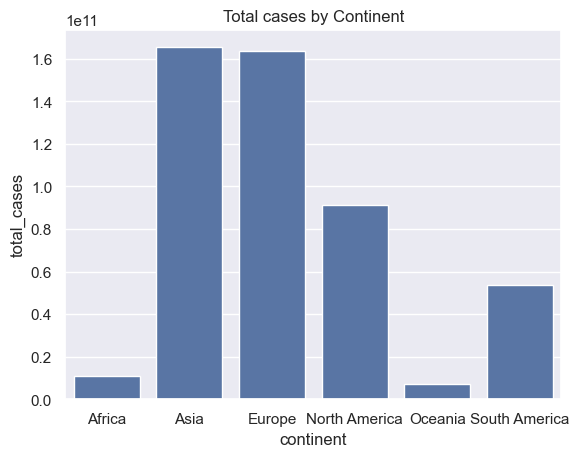

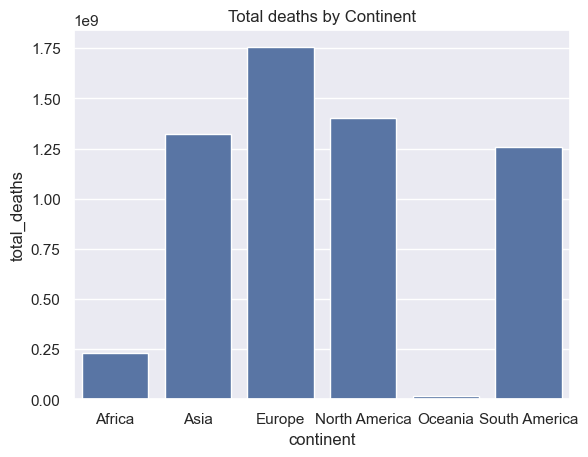

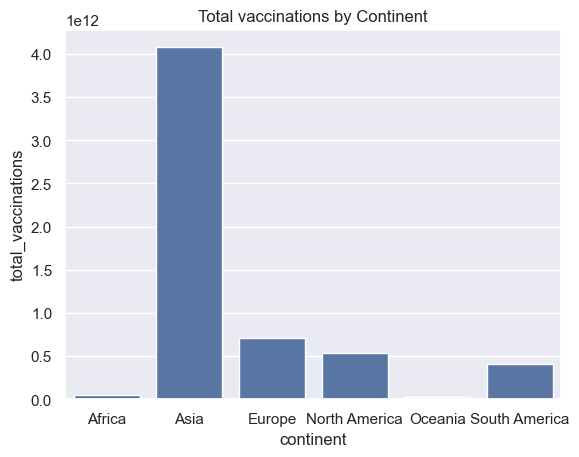

In [38]:
# Aggregate data by continent
continent_data = df.groupby('continent')[['total_cases', 'total_deaths', 'total_vaccinations']].sum().reset_index()
print(continent_data)

# Bar plots
for col in ['total_cases', 'total_deaths', 'total_vaccinations']:
    sns.barplot(data=continent_data, x='continent', y=col)
    plt.title(f'{col.replace("_", " ").capitalize()} by Continent')
    plt.show()

# Study the effect of handwashing facilities

In [53]:
# Check for missing values
print(df['handwashing_facilities'].isnull().sum())
correlation_handwashing = df[['handwashing_facilities', 'new_cases']].corr()
print("Correlation between handwashing facilities and new cases:")
print(correlation_handwashing)

217112
Correlation between handwashing facilities and new cases:
                        handwashing_facilities  new_cases
handwashing_facilities                1.000000   0.020761
new_cases                             0.020761   1.000000


# Relationship between vaccination rates and stringency index

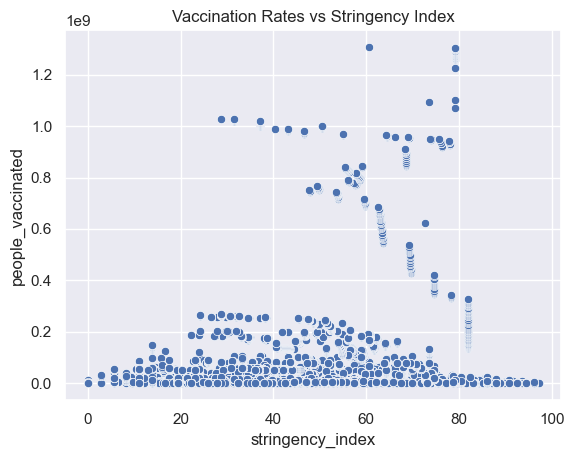

Correlation between vaccination rates and stringency index:
                   stringency_index  people_vaccinated
stringency_index            1.00000           -0.00516
people_vaccinated          -0.00516            1.00000


In [55]:
# Scatter plot
sns.scatterplot(data=df, x='stringency_index', y='people_vaccinated')
plt.title('Vaccination Rates vs Stringency Index')
plt.show()

# Correlation
correlation_vaccination = df[['stringency_index', 'people_vaccinated']].corr()
print("Correlation between vaccination rates and stringency index:")
print(correlation_vaccination)

# Compare cases, deaths, and vaccination trends by continents

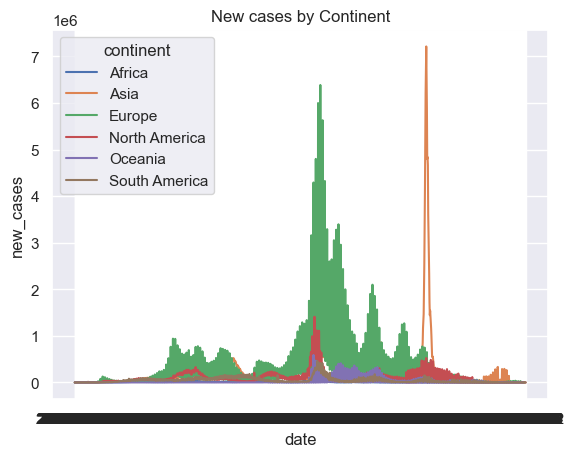

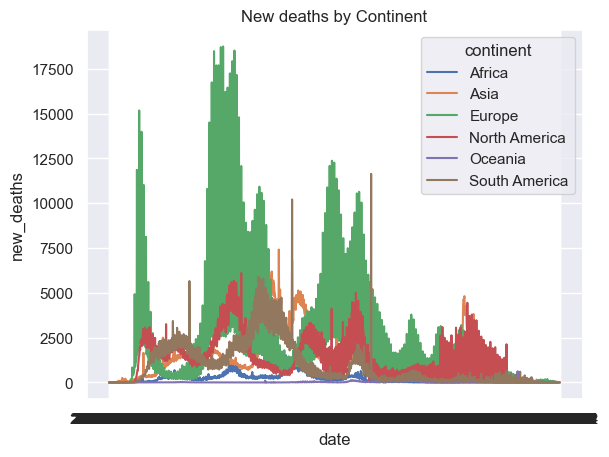

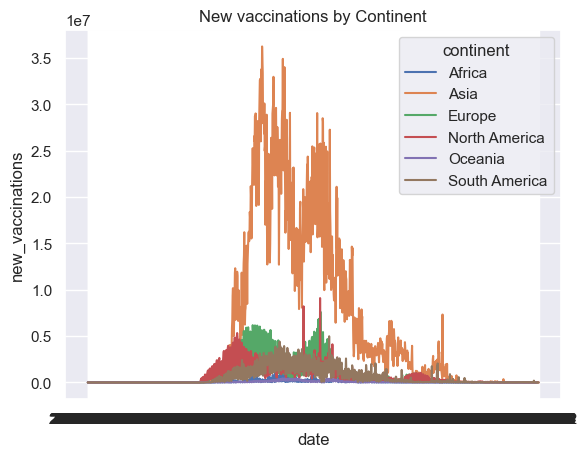

In [68]:
# Group data by continent and date, summing relevant columns
continent_trends = df.groupby(['continent', 'date'])[['new_cases', 'new_deaths', 'new_vaccinations']].sum().reset_index()

# Plot trends for each metric
for col in ['new_cases', 'new_deaths', 'new_vaccinations']:
    sns.lineplot(data=continent_trends, x='date', y=col, hue='continent')
    plt.title(f'{col.replace("_", " ").capitalize()} by Continent')
    plt.show()

# Identify “waves” of the pandemic

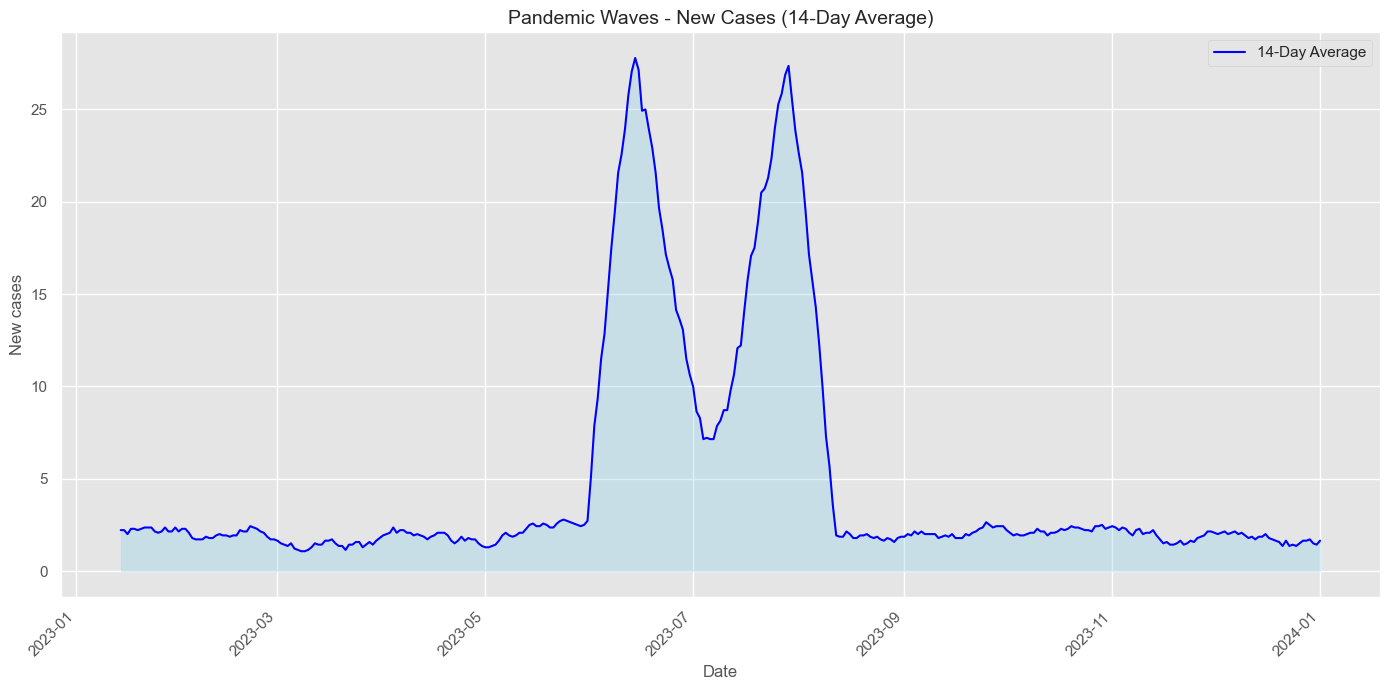

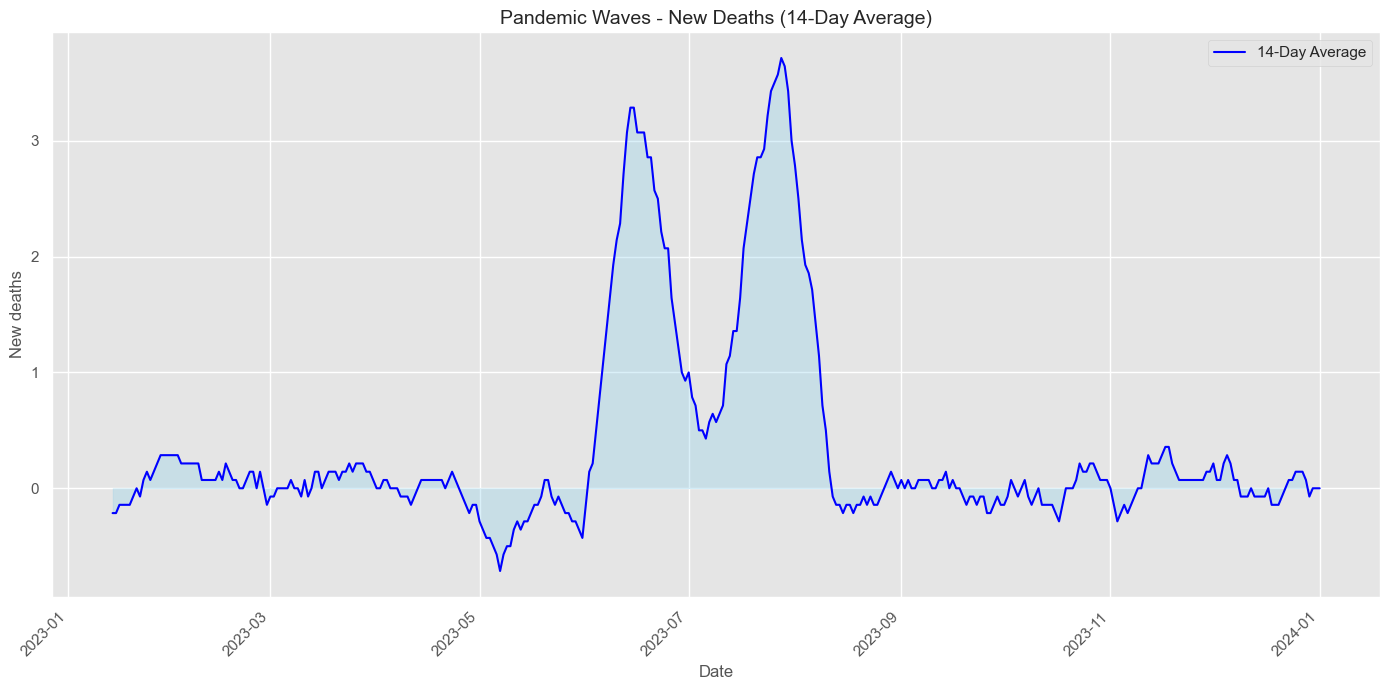

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_waves(df, date_col, value_col, title, window=14):
    """Plots pandemic waves using rolling averages and filled areas."""

    plt.figure(figsize=(14, 7))
    plt.style.use('ggplot') # or any other built-in style or remove this line for default style

    rolling_avg = df[value_col].rolling(window=window).mean()

    plt.plot(df[date_col], rolling_avg, color='blue', label=f'{window}-Day Average')
    plt.fill_between(df[date_col], rolling_avg, alpha=0.3, color='skyblue')

    plt.xlabel(date_col.capitalize(), fontsize=12)
    plt.ylabel(value_col.replace('_', ' ').capitalize(), fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage (using dummy data):
dates = pd.date_range(start='2023-01-01', end='2024-01-01', freq='D')
values_cases = [5 + abs(i - 180) + np.random.randint(-10, 10) if 150 < i < 210 else np.random.randint(0, 5) for i in range(len(dates))]
values_deaths = [x//7 + np.random.randint(-1,2) if x > 0 else 0 for x in values_cases]

df = pd.DataFrame({'date': dates, 'new_cases': values_cases, 'new_deaths': values_deaths})

df['new_cases_roll'] = df['new_cases'].rolling(window=14).mean()
df['new_deaths_roll'] = df['new_deaths'].rolling(window=14).mean()

plot_waves(df, 'date', 'new_cases', 'Pandemic Waves - New Cases (14-Day Average)')
plot_waves(df, 'date', 'new_deaths', 'Pandemic Waves - New Deaths (14-Day Average)')

# ICU admissions and hospitalizations during peak periods

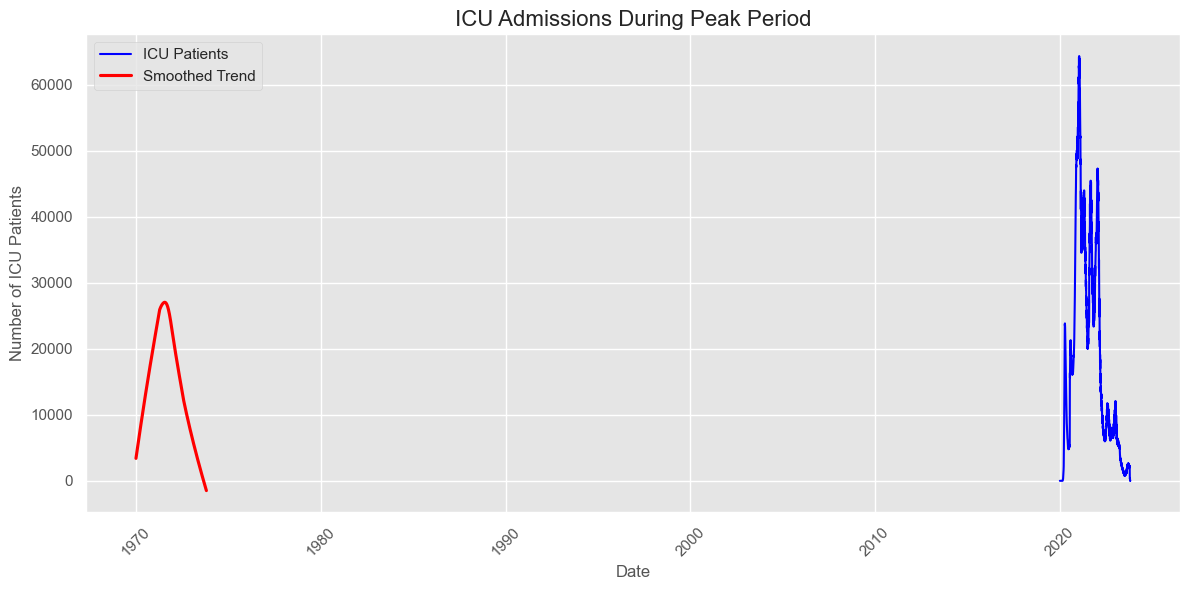

In [78]:
# Convert the 'date' column to a numerical format (e.g., timestamp or days since the first date)
icu_data['date_num'] = (icu_data['date'] - icu_data['date'].min()) / np.timedelta64(1, 'D')

# Now, plot using the converted numeric 'date_num' column
plt.figure(figsize=(12, 6))
sns.lineplot(data=icu_data, x='date', y='icu_patients', color='blue', label='ICU Patients')

# Use the numeric 'date_num' column for the smoothed trend
sns.regplot(data=icu_data, x='date_num', y='icu_patients', scatter=False, lowess=True, color='red', label='Smoothed Trend')

# Enhance aesthetics
plt.title('ICU Admissions During Peak Period', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of ICU Patients')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Insights Extraction**

# Relationship Between Life Expectancy and COVID-19 Outcomes (Cases/Deaths)

15. Relationship Between Life Expectancy and COVID-19 Outcomes
Correlation between life expectancy and total cases: 0.02
Correlation between life expectancy and total deaths: 0.01


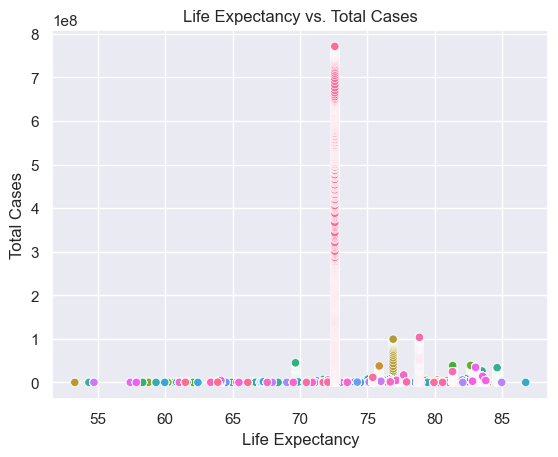

In [4]:
# Heading
print("15. Relationship Between Life Expectancy and COVID-19 Outcomes")

# Filter for necessary columns and drop NaNs
df_filtered = df[['location', 'life_expectancy', 'total_cases', 'total_deaths']].dropna()

# Correlations
correlation_cases = df_filtered['life_expectancy'].corr(df_filtered['total_cases'])
correlation_deaths = df_filtered['life_expectancy'].corr(df_filtered['total_deaths'])

# Output results
print(f"Correlation between life expectancy and total cases: {correlation_cases:.2f}")
print(f"Correlation between life expectancy and total deaths: {correlation_deaths:.2f}")

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_filtered, x='life_expectancy', y='total_cases', hue='location', legend=False)
plt.title("Life Expectancy vs. Total Cases")
plt.xlabel("Life Expectancy")
plt.ylabel("Total Cases")
plt.show()

# Correlation Between Hospital Beds Per Thousand and Fatality Rate

16. Correlation Between Hospital Beds Per Thousand and Fatality Rate
Correlation between hospital beds per thousand and fatality rate: 0.02


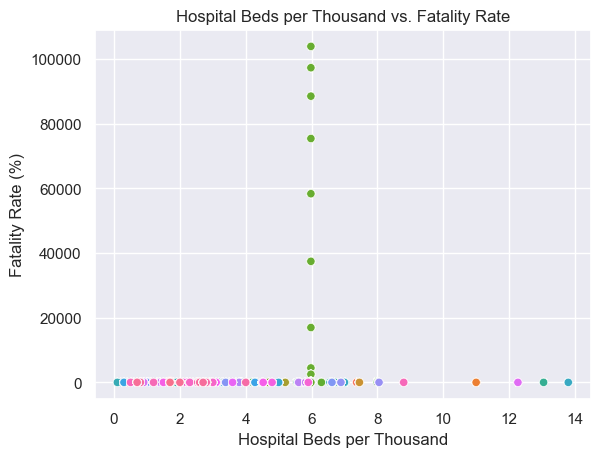

In [5]:
# Heading
print("16. Correlation Between Hospital Beds Per Thousand and Fatality Rate")

# Calculate fatality rate
df['fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100

# Filter and drop NaNs
df_filtered = df[['location', 'hospital_beds_per_thousand', 'fatality_rate']].dropna()

# Correlation
correlation = df_filtered['hospital_beds_per_thousand'].corr(df_filtered['fatality_rate'])
print(f"Correlation between hospital beds per thousand and fatality rate: {correlation:.2f}")

# Plot
sns.scatterplot(data=df_filtered, x='hospital_beds_per_thousand', y='fatality_rate', hue='location', legend=False)
plt.title("Hospital Beds per Thousand vs. Fatality Rate")
plt.xlabel("Hospital Beds per Thousand")
plt.ylabel("Fatality Rate (%)")
plt.show()

# Countries with High ICU Admissions vs. High Deaths

In [6]:
# Heading
print("17. Countries with High ICU Admissions vs. High Deaths")

# Filter data
df_filtered = df[['location', 'icu_patients', 'total_deaths']].dropna()

# Sort by ICU admissions and deaths
top_icu_countries = df_filtered.sort_values('icu_patients', ascending=False).head(10)
top_deaths_countries = df_filtered.sort_values('total_deaths', ascending=False).head(10)

# Output results
print("Top 10 Countries by ICU Admissions:")
print(top_icu_countries[['location', 'icu_patients']])

print("\nTop 10 Countries by Total Deaths:")
print(top_deaths_countries[['location', 'total_deaths']])

17. Countries with High ICU Admissions vs. High Deaths
Top 10 Countries by ICU Admissions:
             location  icu_patients
329856  United States       28891.0
329855  United States       28739.0
329857  United States       28727.0
329850  United States       28608.0
329849  United States       28528.0
329858  United States       28527.0
329851  United States       28491.0
329859  United States       28422.0
329854  United States       28370.0
329852  United States       28365.0

Top 10 Countries by Total Deaths:
             location  total_deaths
330859  United States     1136920.0
330858  United States     1136920.0
330857  United States     1136920.0
330856  United States     1136920.0
330855  United States     1136920.0
330854  United States     1136920.0
330853  United States     1136920.0
330852  United States     1136920.0
330851  United States     1136920.0
330850  United States     1136920.0


# Study the Relationship Between GDP Per Capita and Vaccination Rates

Relationship Between GDP Per Capita and Vaccination Rates
Correlation between GDP per capita and vaccination rates: 0.36


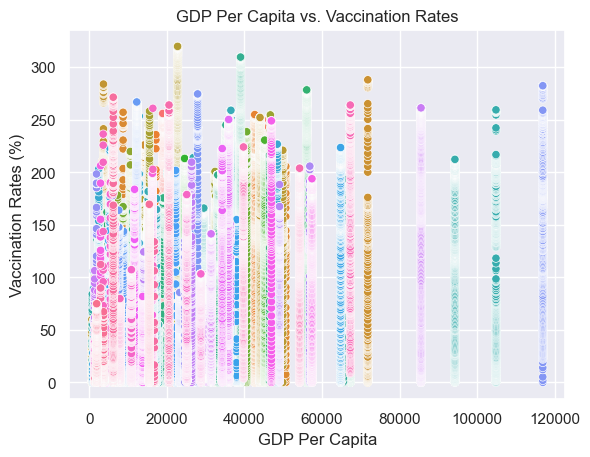

In [8]:
# Heading
print("Relationship Between GDP Per Capita and Vaccination Rates")

# Filter and drop NaNs
df_filtered = df[['location', 'gdp_per_capita', 'total_vaccinations_per_hundred']].dropna()

# Correlation
correlation = df_filtered['gdp_per_capita'].corr(df_filtered['total_vaccinations_per_hundred'])
print(f"Correlation between GDP per capita and vaccination rates: {correlation:.2f}")

# Plot
sns.scatterplot(data=df_filtered, x='gdp_per_capita', y='total_vaccinations_per_hundred', hue='location', legend=False)
plt.title("GDP Per Capita vs. Vaccination Rates")
plt.xlabel("GDP Per Capita")
plt.ylabel("Vaccination Rates (%)")
plt.show()

# Role of Smoking Prevalence in COVID-19 Mortality

In [10]:
# Heading
print("ole of Smoking Prevalence in COVID-19 Mortality")

# Filter and drop NaNs
df_filtered = df[['location', 'male_smokers', 'female_smokers', 'total_deaths_per_million']].dropna()

# Correlations
correlation_male = df_filtered['male_smokers'].corr(df_filtered['total_deaths_per_million'])
correlation_female = df_filtered['female_smokers'].corr(df_filtered['total_deaths_per_million'])

# Output results
print(f"Correlation between male smokers and deaths per million: {correlation_male:.2f}")
print(f"Correlation between female smokers and deaths per million: {correlation_female:.2f}")

ole of Smoking Prevalence in COVID-19 Mortality
Correlation between male smokers and deaths per million: 0.13
Correlation between female smokers and deaths per million: 0.50


# Excess Mortality Trends by Country and Continent

Excess Mortality Trends by Country and Continent


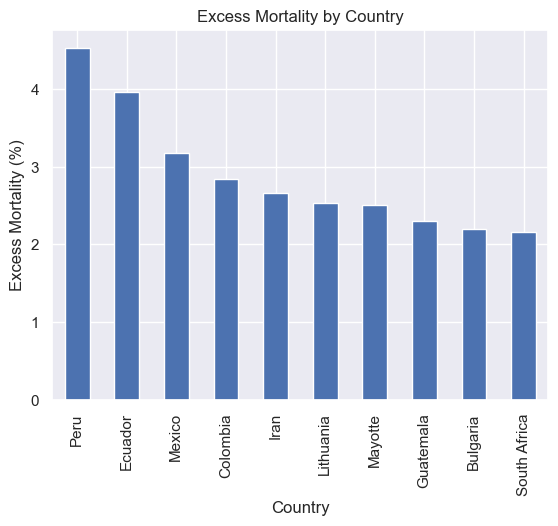

In [12]:
# Heading
print("Excess Mortality Trends by Country and Continent")

# Fill missing values and group by location
df['excess_mortality'] = df['excess_mortality'].fillna(0)
df_grouped = df.groupby('location')['excess_mortality'].mean()

# Bar plot for top countries
df_grouped.nlargest(10).plot(kind='bar', title='Excess Mortality by Country')
plt.xlabel('Country')
plt.ylabel('Excess Mortality (%)')
plt.show()

# Impact of Boosters on Reducing New Cases or Deaths

In [14]:
# Heading
print("Impact of Boosters on Reducing New Cases or Deaths")

# Filter and drop NaNs
df_filtered = df[['location', 'total_boosters', 'new_cases', 'new_deaths']].dropna()

# Correlations
correlation_cases = df_filtered['total_boosters'].corr(df_filtered['new_cases'])
correlation_deaths = df_filtered['total_boosters'].corr(df_filtered['new_deaths'])

# Output results
print(f"Correlation between boosters and new cases: {correlation_cases:.2f}")
print(f"Correlation between boosters and new deaths: {correlation_deaths:.2f}")

Impact of Boosters on Reducing New Cases or Deaths
Correlation between boosters and new cases: 0.29
Correlation between boosters and new deaths: 0.12


# Identify the Top 10 Most Affected Countries (Cases and Deaths)

In [15]:
# Heading
print("Top 10 Most Affected Countries (Cases and Deaths)")

# Sort by total cases and deaths
top_cases = df.sort_values('total_cases', ascending=False).head(10)
top_deaths = df.sort_values('total_deaths', ascending=False).head(10)

# Output results
print("Top 10 Countries by Total Cases:")
print(top_cases[['location', 'total_cases']])

print("\nTop 10 Countries by Total Deaths:")
print(top_deaths[['location', 'total_deaths']])

Top 10 Most Affected Countries (Cases and Deaths)
Top 10 Countries by Total Cases:
       location  total_cases
345923    World  771407061.0
345921    World  771407061.0
345924    World  771407061.0
345922    World  771407061.0
345920    World  771405394.0
345919    World  771404217.0
345918    World  771401265.0
345917    World  771391354.0
345916    World  771378834.0
345915    World  771351375.0

Top 10 Countries by Total Deaths:
       location  total_deaths
345924    World     6972139.0
345923    World     6972139.0
345922    World     6972139.0
345921    World     6972139.0
345920    World     6972084.0
345919    World     6972080.0
345918    World     6972045.0
345917    World     6972019.0
345916    World     6971988.0
345915    World     6971877.0


# Calculate the Global Case Fatality Rate (CFR) and Compare by Country/Continent

In [16]:
# Heading
print("42. Global Case Fatality Rate (CFR) and Country/Continent Comparison")

# Calculate global CFR
total_cases = df['total_cases'].sum()
total_deaths = df['total_deaths'].sum()
global_cfr = (total_deaths / total_cases) * 100

print(f"Global Case Fatality Rate (CFR): {global_cfr:.2f}%")

# CFR by country
df['cfr'] = (df['total_deaths'] / df['total_cases']) * 100
cfr_by_country = df[['location', 'cfr']].dropna().sort_values('cfr', ascending=False)

print("\nTop 10 Countries by CFR:")
print(cfr_by_country.head(10))

42. Global Case Fatality Rate (CFR) and Country/Continent Comparison
Global Case Fatality Rate (CFR): 1.20%

Top 10 Countries by CFR:
       location       cfr
105343   France  103875.0
105347   France  103875.0
105344   France  103875.0
105345   France  103875.0
105346   France  103875.0
105349   France  103875.0
105348   France  103875.0
105336   France   97275.0
105337   France   97275.0
105338   France   97275.0


# Analyze the Relationship Between Positive Test Rate and Cases Detected

Correlation between positive test rate and cases detected: 0.14


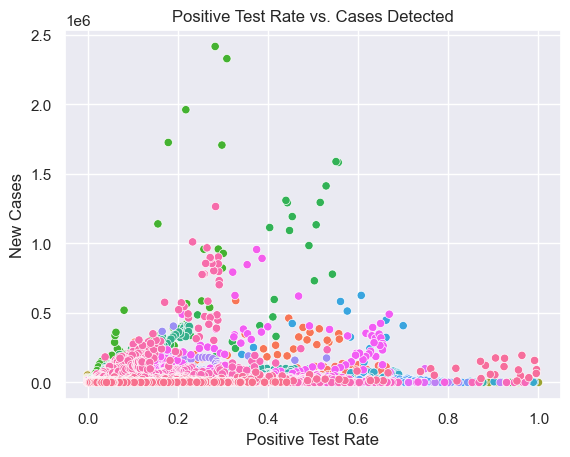

In [3]:
# Filter and clean the data
df_filtered = df[['location', 'positive_rate', 'new_cases']].dropna()

# Correlation analysis
correlation = df_filtered['positive_rate'].corr(df_filtered['new_cases'])
print(f"Correlation between positive test rate and cases detected: {correlation:.2f}")

# Scatter plot
sns.scatterplot(data=df_filtered, x='positive_rate', y='new_cases', hue='location', legend=False)
plt.title("Positive Test Rate vs. Cases Detected")
plt.xlabel("Positive Test Rate")
plt.ylabel("New Cases")
plt.show()

# Correlation Between Stringency Index and New Case Trends

Correlation between stringency index and new cases: 0.02


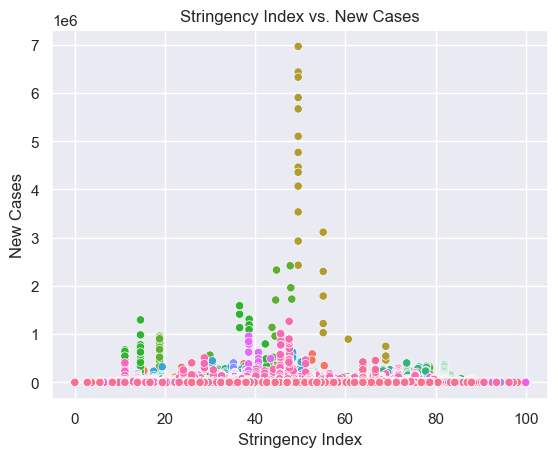

In [4]:
# Filter and clean the data
df_filtered = df[['location', 'stringency_index', 'new_cases']].dropna()

# Correlation analysis
correlation = df_filtered['stringency_index'].corr(df_filtered['new_cases'])
print(f"Correlation between stringency index and new cases: {correlation:.2f}")

# Scatter plot
sns.scatterplot(data=df_filtered, x='stringency_index', y='new_cases', hue='location', legend=False)
plt.title("Stringency Index vs. New Cases")
plt.xlabel("Stringency Index")
plt.ylabel("New Cases")
plt.show()

# Relationship Between Reproduction Rate and Total Tests Conducted

Correlation between reproduction rate and total tests: -0.02


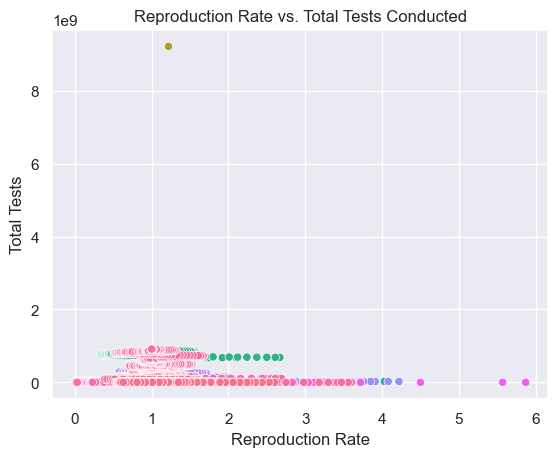

In [6]:
# Filter and clean the data
df_filtered = df[['location', 'reproduction_rate', 'total_tests']].dropna()

# Correlation analysis
correlation = df_filtered['reproduction_rate'].corr(df_filtered['total_tests'])
print(f"Correlation between reproduction rate and total tests: {correlation:.2f}")

# Scatter plot
sns.scatterplot(data=df_filtered, x='reproduction_rate', y='total_tests', hue='location', legend=False)
plt.title("Reproduction Rate vs. Total Tests Conducted")
plt.xlabel("Reproduction Rate")
plt.ylabel("Total Tests")
plt.show()

# Forecast Trends in Cases, Deaths, and Vaccinations Using Smoothed Time-Series Data

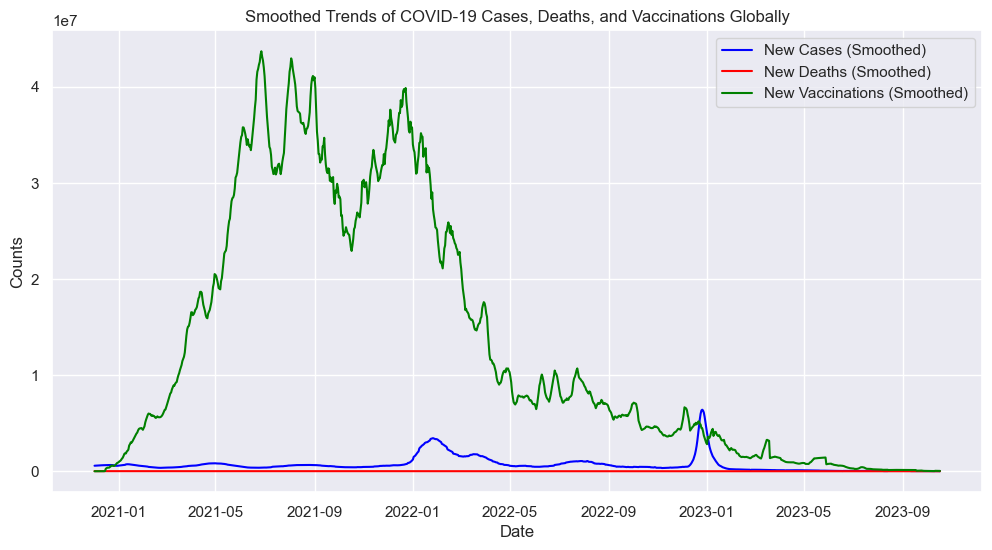


Forecasting new_cases_smoothed...


C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


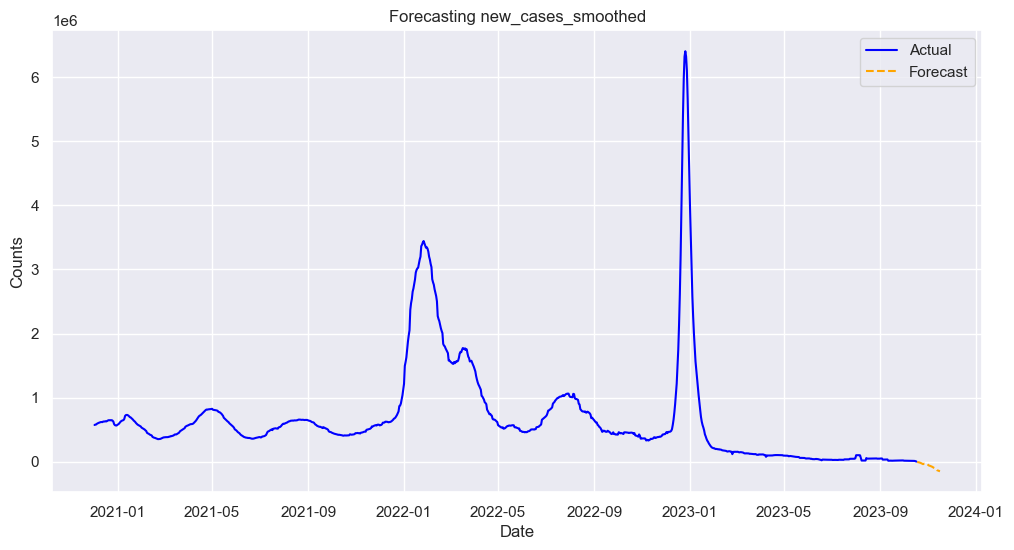


Forecasting new_deaths_smoothed...


C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


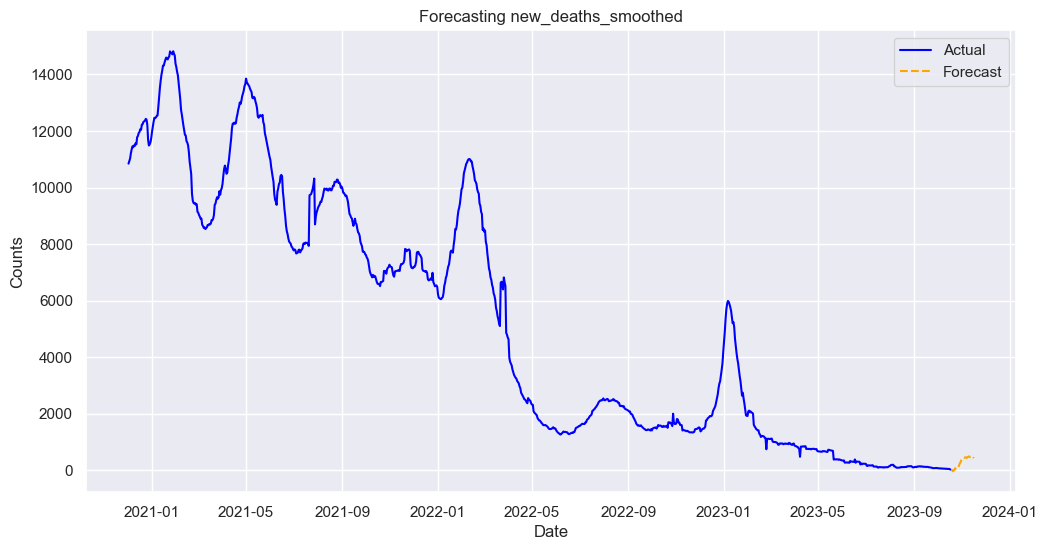


Forecasting new_vaccinations_smoothed...


C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


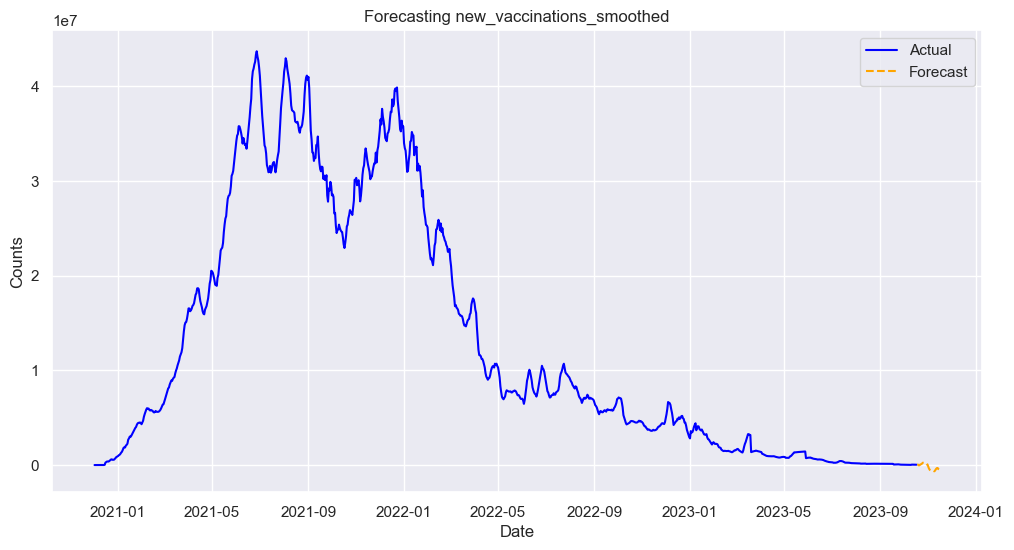

            new_cases_smoothed  new_deaths_smoothed  new_vaccinations_smoothed
2023-10-18        -1722.085323            -0.682822               27845.014895
2023-10-19        -6064.854901             6.362065               49364.881197
2023-10-20        -8437.360882           -37.164919              -36699.886508
2023-10-21       -11045.785405           -14.748150              -14719.026545
2023-10-22       -16158.289097             8.974239               64910.567744
2023-10-23       -21522.753469            70.795923               90444.613131
2023-10-24       -27086.640225            40.128082              145674.050182
2023-10-25       -34524.551132            38.194864              243572.583964
2023-10-26       -34852.847223            64.201930              231452.888324
2023-10-27       -27197.157840           110.485987              212971.969430
2023-10-28       -28006.785980           171.466812              179266.718232
2023-10-29       -30488.011847           243.066703 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the OWID COVID-19 dataset
file_path = "owid-covid-data.csv"  # Update the path as needed
data = pd.read_csv(file_path)

# Filter global data
global_data = data[data['location'] == 'World']

# Focus on relevant columns
global_data = global_data[['date', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']].dropna()

# Convert date to datetime format
global_data['date'] = pd.to_datetime(global_data['date'])

# Set date as index
global_data.set_index('date', inplace=True)

# Plot smoothed trends
plt.figure(figsize=(12, 6))
plt.plot(global_data.index, global_data['new_cases_smoothed'], label='New Cases (Smoothed)', color='blue')
plt.plot(global_data.index, global_data['new_deaths_smoothed'], label='New Deaths (Smoothed)', color='red')
plt.plot(global_data.index, global_data['new_vaccinations_smoothed'], label='New Vaccinations (Smoothed)', color='green')
plt.title('Smoothed Trends of COVID-19 Cases, Deaths, and Vaccinations Globally')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Prepare data for forecasting
columns_to_forecast = ['new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']
forecast_results = {}

for column in columns_to_forecast:
    print(f"\nForecasting {column}...")
    
    # Holt-Winters Exponential Smoothing
    model = ExponentialSmoothing(global_data[column], seasonal='add', seasonal_periods=30, trend='add').fit()
    
    # Forecast for the next 30 days
    forecast = model.forecast(steps=30)
    
    # Save results
    forecast_results[column] = forecast
    
    # Plot actual vs forecast
    plt.figure(figsize=(12, 6))
    plt.plot(global_data[column], label='Actual', color='blue')
    plt.plot(forecast, label='Forecast', color='orange', linestyle='--')
    plt.title(f'Forecasting {column}')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

# Combine forecast results into a DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index = pd.date_range(start=global_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
print(forecast_df)

# Study Daily and Cumulative Trends of Cases, Deaths, and Vaccinations Globally

Dataset loaded successfully!
Column Names: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinatio

C:\Users\abc\AppData\Local\Temp\ipykernel_10356\1106595182.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data[['new_cases', 'new_deaths', 'new_vaccinations']] = global_data[


<Figure size 1200x600 with 0 Axes>

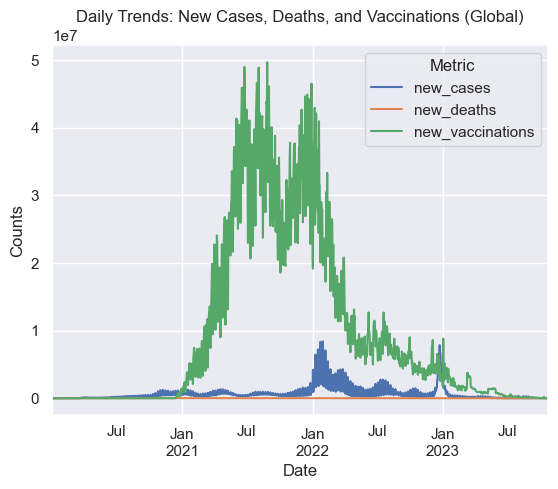

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "owid-covid-data.csv"  # Replace with the correct path to your dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at: {file_path}. Please check the file path.")

# Preview the dataset
print("Column Names:", data.columns)
print("Dataset Preview:")
print(data.head())

# Ensure required columns are present
required_columns = ['location', 'date', 'new_cases', 'new_deaths', 'new_vaccinations']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in dataset: {missing_columns}")

# Convert the `date` column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Filter global data (location == "World")
global_data = data[data['location'] == "World"]

# Check if "World" data exists
if global_data.empty:
    raise ValueError("No data for 'World' in the dataset. Check if 'location' column has 'World' as a value.")

# Set `date` as the index
global_data.set_index('date', inplace=True)

# Handle missing values by filling with zeros
global_data[['new_cases', 'new_deaths', 'new_vaccinations']] = global_data[
    ['new_cases', 'new_deaths', 'new_vaccinations']
].fillna(0)

# Plot daily trends
plt.figure(figsize=(12, 6))
global_data[['new_cases', 'new_deaths', 'new_vaccinations']].plot(
    title="Daily Trends: New Cases, Deaths, and Vaccinations (Global)",
    ylabel="Counts",
    xlabel="Date"
)
plt.legend(title="Metric")
plt.grid(True)
plt.show()


# Countries with Disproportionately High or Low Death Rates Despite Similar Case Numbers

In [32]:
# Calculate death rate
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100

# Filter countries with similar case numbers
similar_cases = df[(df['total_cases'] > 1e6) & (df['total_cases'] < 2e6)]

# Analyze death rates
high_death_rate = similar_cases.sort_values('death_rate', ascending=False).head(10)
low_death_rate = similar_cases.sort_values('death_rate').head(10)

print("Top 10 Countries with High Death Rates:")
print(high_death_rate[['location', 'total_cases', 'death_rate']])

print("\nTop 10 Countries with Low Death Rates:")
print(low_death_rate[['location', 'total_cases', 'death_rate']])

Top 10 Countries with High Death Rates:
             location  total_cases  death_rate
98441  European Union    1010033.0   11.946738
98442  European Union    1011673.0   11.939728
98443  European Union    1013591.0   11.931538
98444  European Union    1015670.0   11.923853
98445  European Union    1018079.0   11.911158
97009          Europe    1101620.0   11.896207
98446  European Union    1020625.0   11.894085
98447  European Union    1022996.0   11.878541
97010          Europe    1117623.0   11.867061
97011          Europe    1134017.0   11.843561

Top 10 Countries with Low Death Rates:
           location  total_cases  death_rate
282047    Singapore    1988760.0    0.082413
217628  New Zealand    1001829.0    0.082449
282048    Singapore    1988760.0    0.082514
282046    Singapore    1979259.0    0.082809
282045    Singapore    1969648.0    0.083061
282044    Singapore    1957916.0    0.083456
282043    Singapore    1953197.0    0.083555
282042    Singapore    1948402.0    0.08360

# Analyze Testing Density (Total Tests Per Thousand) by Country and Continent

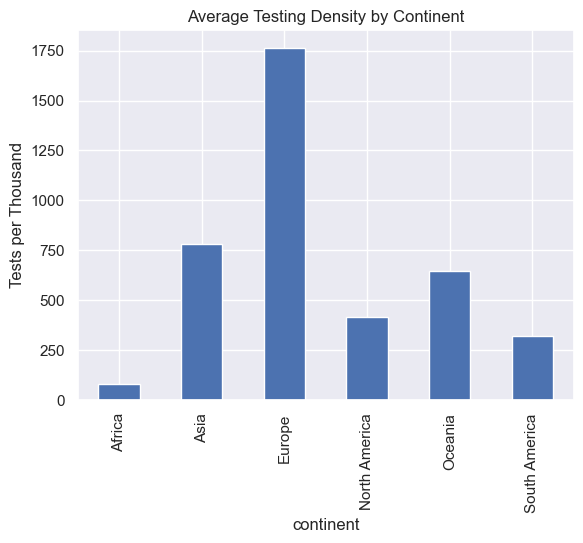

In [33]:
# Group by continent and calculate mean testing density
testing_density = df.groupby('continent')['total_tests_per_thousand'].mean().dropna()

# Bar plot
testing_density.plot(kind='bar', title="Average Testing Density by Continent", ylabel="Tests per Thousand")
plt.show()

# Compare the Percentage of Fully Vaccinated Individuals with New Cases

Correlation between full vaccination percentage and new cases: 0.05


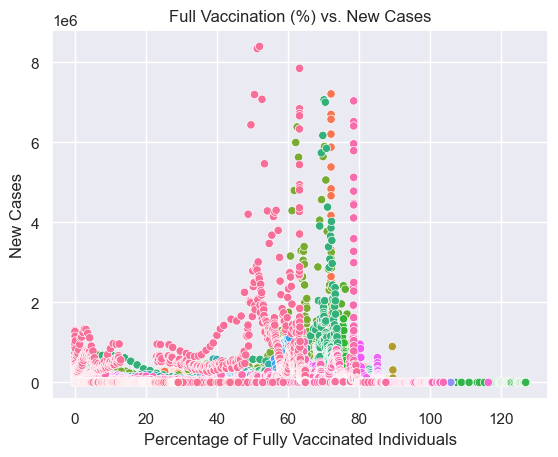

In [34]:
# Filter and clean the data
df_filtered = df[['location', 'people_fully_vaccinated_per_hundred', 'new_cases']].dropna()

# Correlation analysis
correlation = df_filtered['people_fully_vaccinated_per_hundred'].corr(df_filtered['new_cases'])
print(f"Correlation between full vaccination percentage and new cases: {correlation:.2f}")

# Scatter plot
sns.scatterplot(data=df_filtered, x='people_fully_vaccinated_per_hundred', y='new_cases', hue='location', legend=False)
plt.title("Full Vaccination (%) vs. New Cases")
plt.xlabel("Percentage of Fully Vaccinated Individuals")
plt.ylabel("New Cases")
plt.show()

# Testing Strategies of Countries with Low Death Rates

In [35]:
# Calculate death rate
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100

# Filter countries with low death rates
low_death_countries = df[df['death_rate'] < 1]

# Analyze testing strategies
low_death_countries = low_death_countries[['location', 'total_tests_per_thousand', 'death_rate']].dropna()

print("Testing Strategies of Low Death Rate Countries:")
print(low_death_countries.sort_values('total_tests_per_thousand', ascending=False).head(10))

Testing Strategies of Low Death Rate Countries:
      location  total_tests_per_thousand  death_rate
75644   Cyprus                 32925.826    0.212627
75643   Cyprus                 32850.820    0.212845
75642   Cyprus                 32790.219    0.213193
75641   Cyprus                 32715.521    0.213588
75640   Cyprus                 32622.646    0.213833
75639   Cyprus                 32558.218    0.214443
75638   Cyprus                 32490.968    0.214741
75637   Cyprus                 32400.823    0.215470
75636   Cyprus                 32312.281    0.216555
75635   Cyprus                 32231.045    0.217336


#  Impact of Limited Handwashing Facilities on COVID-19 Spread

Correlation between handwashing facilities and total cases per million: 0.44


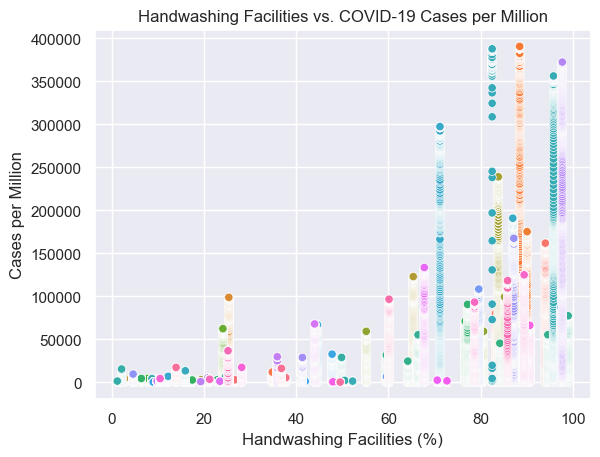

In [36]:
# Filter and clean the data
df_filtered = df[['location', 'handwashing_facilities', 'total_cases_per_million']].dropna()

# Correlation analysis
correlation = df_filtered['handwashing_facilities'].corr(df_filtered['total_cases_per_million'])
print(f"Correlation between handwashing facilities and total cases per million: {correlation:.2f}")

# Scatter plot
sns.scatterplot(data=df_filtered, x='handwashing_facilities', y='total_cases_per_million', hue='location', legend=False)
plt.title("Handwashing Facilities vs. COVID-19 Cases per Million")
plt.xlabel("Handwashing Facilities (%)")
plt.ylabel("Cases per Million")
plt.show()


In [ ]:
pip install tensorflow

Random Forest Mean Squared Error: 262931.7132731018
Random Forest R-squared: 0.9998877919517003
XGBoost Mean Squared Error: 508045.8771242824
XGBoost R-squared: 0.9997831876740574


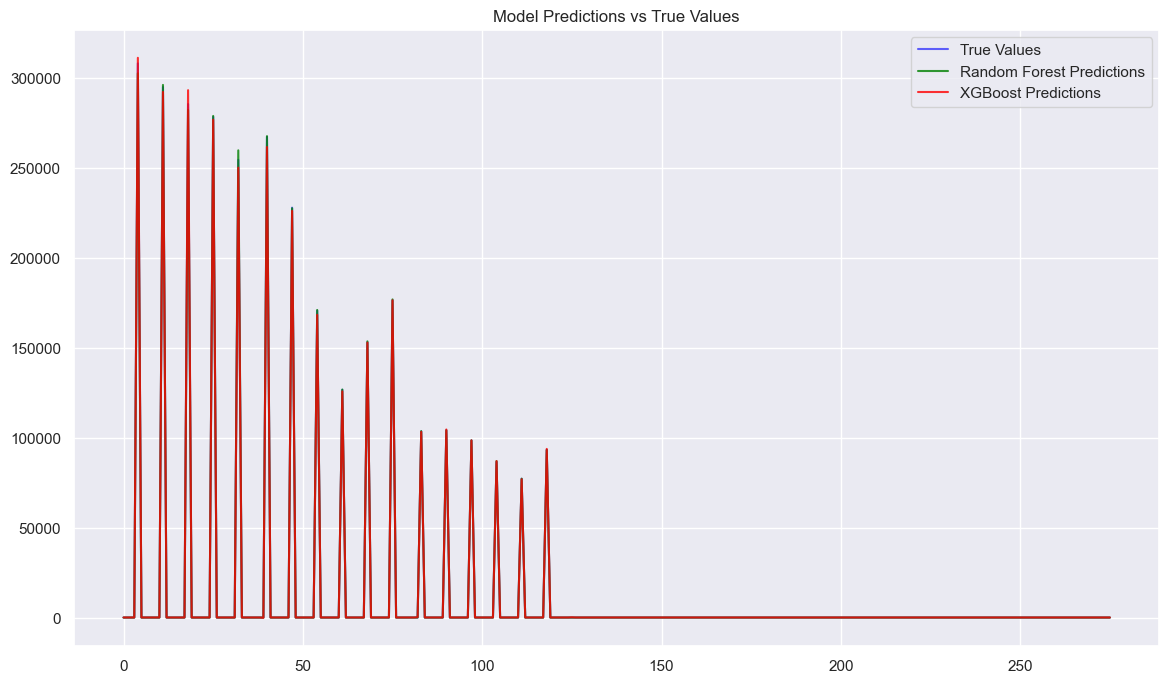

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for a specific location (e.g., 'United States') to avoid mixed data
df = df[df['location'] == 'United States']

# Select relevant columns
columns_to_keep = ['date', 'new_cases', 'new_deaths', 'new_vaccinations']
df = df[columns_to_keep]

# Handle missing values (fill with 0 or forward fill as appropriate)
df.fillna(0, inplace=True)

# Create lag features for time-series forecasting
df['new_cases_lag_7'] = df['new_cases'].shift(7)
df['new_vaccinations_lag_7'] = df['new_vaccinations'].shift(7)

# Drop rows with missing values after creating lag features
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['new_cases', 'new_deaths', 'new_vaccinations', 'new_cases_lag_7', 'new_vaccinations_lag_7']]
y = df['new_cases']  # Target variable: predicting 'new_cases'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

# Plot Results for Random Forest and XGBoost
plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label='True Values', color='blue', alpha=0.6)
plt.plot(y_pred_rf, label='Random Forest Predictions', color='green', alpha=0.8)
plt.plot(y_pred_xgb, label='XGBoost Predictions', color='red', alpha=0.8)
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()